In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [16]:
df = pd.read_csv("clean_data.csv", index_col=0)
df

,index,total_positive,total_reviews,required_age,price,Violent,Education,Sexual Content,Strategy,Nudity,...,Partial Controller Support,Full controller support,Shared/Split Screen,In-App Purchases,Steam Workshop,linux,windows,mac,release_year,score
0,0,446,467,0,1379,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2021,0.955032
1,1,146,199,0,399,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2021,0.733668
2,2,70,76,0,499,0,0,0,1,0,...,1,0,0,0,0,0,1,0,2021,0.921053
3,3,224,235,0,5999,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2022,0.953191
4,4,68,70,0,799,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2021,0.971429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,8000,45,66,0,1499,0,0,0,1,0,...,0,0,0,0,0,0,1,0,2022,0.681818
7991,8001,69,76,0,699,0,0,0,1,0,...,0,0,0,0,0,1,1,1,2016,0.907895
7992,8002,116,154,0,1499,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2017,0.753247
7993,8003,45,50,0,199,0,0,0,1,0,...,0,0,0,0,0,0,1,0,2022,0.900000


# Fitting linear regression with all variables

In [100]:
df.drop(["total_positive", "total_reviews"], axis=1, inplace=True)

KeyError: "['total_positive' 'total_reviews'] not found in axis"

In [101]:
df.drop(['Remote Play auf Tablets'], axis=1, inplace=True)

In [102]:
df.columns

Index(['index', 'required_age', 'price', 'Violent', 'Education',
       'Sexual Content', 'Strategy', 'Nudity', 'RPG', 'Free to Play', 'Racing',
       'Gore', 'Adventure', 'Action', 'Sports', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Co-op', 'VR Only', 'Downloadable Content',
       'Remote Play on Tablet', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'VR Supported', 'Online PvP',
       'Remote Play on Phone', 'Steam Turn Notifications',
       'Steam Achievements', 'Steam Trading Cards', 'Stats',
       'Commentary available', 'Remote Play on TV',
       'Shared/Split Screen Co-op', 'Single-player',
       'Additional High-Quality Audio', 'Valve Anti-Cheat enabled',
       'Shared/Split Screen PvP', 'Remote Play Together', 'PvP',
       'Includes level editor', 'SteamVR Collectibles', 'Online Co-op', 'MMO',
       'Captions available', 'VR Support', 'Multi-player',
       'Includes Source SDK', 'Tracked Contro

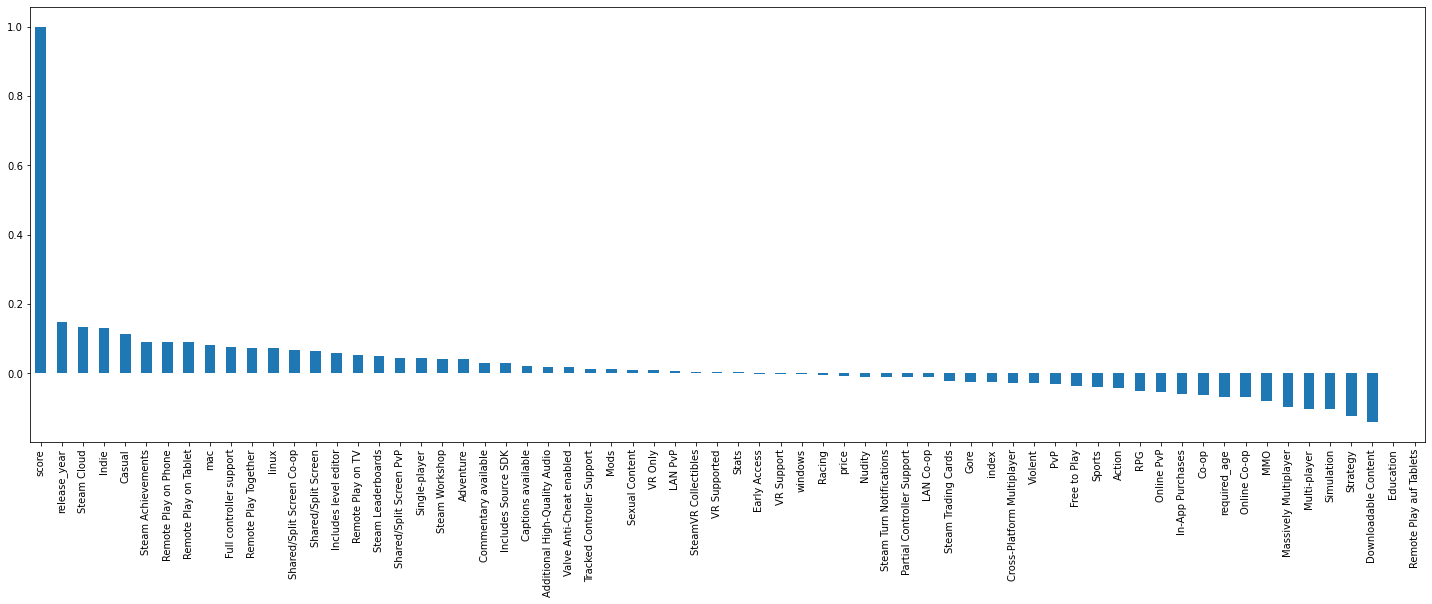

In [23]:
plt.figure(figsize=(25,8))
bars = df.corr()['score'].sort_values(ascending=False).plot(kind='bar')

In [179]:
def find_predictors(df):
    
    # Sort by absolute correlation
    predictors = abs(df.corr()['score']).sort_values(ascending=False).drop("score")

    r2_max = 0
    i_max = 0

    # add variables until model is overfitting
    for i, col in enumerate(list(predictors.index)):
        
        X = df[predictors.index[:i+1]]
        
        X_train, X_test, y_train, y_test = train_test_split(X, df["score"], test_size=0.3, random_state=42)
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > r2_max:
            r2_max = r2
            i_max = i+1

    # return predictors
    return predictors[0:i_max] 


In [180]:
# train again best model
predictors  = find_predictors(df)
X_train, X_test, y_train, y_test = train_test_split(df[list(predictors.index)], df["score"], test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

len(predictors), round(r2, 5), round(MSE, 5), round(explained_var,5)

(53, 0.12775, 0.02046, 0.12819)

In [30]:
# table printer
for var, corr in predictors.iteritems():
    print(var + " & "+ str(round(corr, 5)) + " \\\\")
    

release_year & 0.14812 \\
Downloadable Content & 0.1407 \\
Steam Cloud & 0.13262 \\
Indie & 0.13143 \\
Strategy & 0.12253 \\
Casual & 0.1116 \\
Simulation & 0.10349 \\
Multi-player & 0.10241 \\
Massively Multiplayer & 0.09892 \\
Steam Achievements & 0.09089 \\
Remote Play on Phone & 0.08918 \\
Remote Play on Tablet & 0.08865 \\
MMO & 0.08048 \\
mac & 0.08035 \\
Full controller support & 0.07502 \\
Remote Play Together & 0.07328 \\
linux & 0.07222 \\
Online Co-op & 0.06992 \\
required_age & 0.06839 \\
Shared/Split Screen Co-op & 0.06548 \\
Co-op & 0.06426 \\
Shared/Split Screen & 0.06378 \\
In-App Purchases & 0.05918 \\
Includes level editor & 0.05864 \\
Online PvP & 0.0556 \\
Remote Play on TV & 0.0511 \\
RPG & 0.05051 \\
Steam Leaderboards & 0.04989 \\
Shared/Split Screen PvP & 0.04396 \\
Single-player & 0.04232 \\
Action & 0.04225 \\
Steam Workshop & 0.04067 \\
Adventure & 0.04017 \\
Sports & 0.0396 \\
Free to Play & 0.03571 \\
PvP & 0.03246 \\
Violent & 0.02958 \\
Commentary availab

In [31]:
df.columns

Index(['index', 'required_age', 'price', 'Violent', 'Education',
       'Sexual Content', 'Strategy', 'Nudity', 'RPG', 'Free to Play', 'Racing',
       'Gore', 'Adventure', 'Action', 'Sports', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Co-op', 'VR Only', 'Downloadable Content',
       'Remote Play on Tablet', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'VR Supported', 'Online PvP',
       'Remote Play on Phone', 'Steam Turn Notifications',
       'Steam Achievements', 'Steam Trading Cards', 'Stats',
       'Commentary available', 'Remote Play on TV',
       'Shared/Split Screen Co-op', 'Single-player',
       'Additional High-Quality Audio', 'Valve Anti-Cheat enabled',
       'Shared/Split Screen PvP', 'Remote Play Together',
       'Remote Play auf Tablets', 'PvP', 'Includes level editor',
       'SteamVR Collectibles', 'Online Co-op', 'MMO', 'Captions available',
       'VR Support', 'Multi-player', 'Includes S

## Linear regression with MLP

In [42]:
# Try with MLP
X_train, X_test, y_train, y_test = train_test_split(df.drop("score", axis = 1), df["score"], test_size=0.3, random_state=42)
reg = MLPRegressor(hidden_layer_sizes=(250,200,150,100,50), activation='logistic' ,random_state=42, max_iter=10000, batch_size = 64).fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
explained_var_MLP = explained_variance_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(round(r2, 5), round(MSE, 5))
print(round(explained_var_MLP,5))

'''
# Hyperparameter optimization
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (200,150,100,50), (250,200,150,100,50)],
    'max_iter': [5000, 7500, 10000],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(reg, param_grid, n_jobs= -1)
grid.fit(X_train, y_train)

print(grid.best_params_) 
'''

-0.02254 0.02399
4e-05


"\n# Hyperparameter optimization\nparam_grid = {\n    'hidden_layer_sizes': [(150,100,50), (200,150,100,50), (250,200,150,100,50)],\n    'max_iter': [5000, 7500, 10000],\n    'activation': ['relu'],\n    'solver': ['adam'],\n    'alpha': [0.0001, 0.05],\n    'learning_rate': ['constant','adaptive'],\n}\n\ngrid = GridSearchCV(reg, param_grid, n_jobs= -1)\ngrid.fit(X_train, y_train)\n\nprint(grid.best_params_) \n"

# try different approaches to obtaining the best explained variance

## try obtaining best fit by sequentially adding variables that improve MSE

In [17]:
import copy

In [182]:
def find_best_fit_minimize(df, start_index=1):
    #functions tries to slowly build up accuracy by adding variables in seeing wheter they add accuracy. Drop if not
    previous_good_regressors_indices = [start_index]
    good_regessor_indices = [start_index]
    previous_full = np.Inf
    i=1
    reg_rmse_list = []
    best_explainded_variance = 0
    y_pred_best = np.array(int(0.7*len(df)))
    while(df.columns[good_regessor_indices[-1]]!="score"):
        
        # consider changing random state later(other possible combination of best predictor variables)
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, good_regessor_indices],df["score"] , test_size=0.3, random_state=42)
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        new_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        explained_var = explained_variance_score(y_test, y_pred)
        
        print("RMS difference: {}\n".format(new_reg_rmse - previous_full))
        
        # check if the error of the model with new variable added is smaller than previous error
        if(new_reg_rmse - previous_full<0):
            # if yes, keep variable in the model
            
            #update list of variables that improve prediction
            previous_good_regressors_indices = copy.deepcopy(good_regessor_indices)
            
            #update error s.t. it is error of new and improved model
            previous_full = new_reg_rmse
            
            # update histroy of MSE of helpful variables
            reg_rmse_list.append(new_reg_rmse)
            
            y_pred_best = y_pred
            
            best_explainded_variance = explained_var
            
            
        else:
            # if new variable does not decrease MSE, kick it out of the model
            good_regessor_indices = copy.deepcopy(previous_good_regressors_indices)
        
        #add next variable to see if it improves performance
        good_regessor_indices.append(start_index+i)
        if(df.columns[good_regessor_indices[-1]]!="score"):
            print("Try these regressors next: {}".format(df.columns[good_regessor_indices]))

        
            
        i=i+1
        
    return reg_rmse_list, previous_good_regressors_indices, y_pred_best, best_explainded_variance
        
        
        
        
        


In [183]:
best_fit_indices_min = find_best_fit_minimize(df)

RMS difference: -inf

Try these regressors next: Index(['required_age', 'price'], dtype='object')
RMS difference: 6.699117894357065e-05

Try these regressors next: Index(['required_age', 'Violent'], dtype='object')
RMS difference: -7.736159665797104e-05

Try these regressors next: Index(['required_age', 'Violent', 'Education'], dtype='object')
RMS difference: 0.0

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content'], dtype='object')
RMS difference: -2.7464546818595226e-05

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy'], dtype='object')
RMS difference: -0.001164212446864793

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity'], dtype='object')
RMS difference: -2.773216656323796e-05

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity',
       'RPG'],
      dtype='object')
RMS difference: -0.00018418057347149852

Try these re

RMS difference: 3.4442106169124687e-05

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity',
       'RPG', 'Free to Play', 'Racing', 'Action', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Downloadable Content', 'Remote Play on Tablet',
       'Steam Leaderboards', 'Steam Turn Notifications', 'Steam Achievements',
       'Steam Trading Cards', 'Commentary available'],
      dtype='object')
RMS difference: -1.9339879821389516e-05

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity',
       'RPG', 'Free to Play', 'Racing', 'Action', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Downloadable Content', 'Remote Play on Tablet',
       'Steam Leaderboards', 'Steam Turn Notifications', 'Steam Achievements',
       'Steam Trading Cards', 'Commentary available', 'Remote Play on TV'],
      

      dtype='object')
RMS difference: 7.419080964660152e-06

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity',
       'RPG', 'Free to Play', 'Racing', 'Action', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Downloadable Content', 'Remote Play on Tablet',
       'Steam Leaderboards', 'Steam Turn Notifications', 'Steam Achievements',
       'Steam Trading Cards', 'Commentary available',
       'Shared/Split Screen Co-op', 'Additional High-Quality Audio',
       'Valve Anti-Cheat enabled', 'Shared/Split Screen PvP',
       'Includes level editor', 'MMO', 'Captions available', 'VR Support',
       'Multi-player', 'Includes Source SDK', 'Steam Cloud', 'LAN PvP',
       'Full controller support'],
      dtype='object')
RMS difference: 8.707646007119485e-05

Try these regressors next: Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity',
       'RPG', 'Free to Play', 

In [251]:
#best_fit_indices_min

In [187]:
df.columns[best_fit_indices_min[1]]

Index(['required_age', 'Violent', 'Sexual Content', 'Strategy', 'Nudity',
       'RPG', 'Free to Play', 'Racing', 'Action', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Downloadable Content', 'Remote Play on Tablet',
       'Steam Leaderboards', 'Steam Turn Notifications', 'Steam Achievements',
       'Steam Trading Cards', 'Commentary available',
       'Shared/Split Screen Co-op', 'Additional High-Quality Audio',
       'Valve Anti-Cheat enabled', 'Shared/Split Screen PvP',
       'Includes level editor', 'MMO', 'Captions available', 'VR Support',
       'Multi-player', 'Includes Source SDK', 'Steam Cloud', 'LAN PvP',
       'Steam Workshop', 'linux', 'windows', 'release_year'],
      dtype='object')

In [302]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[best_fit_indices_min[1]]],df["score"] , test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
explained_var = explained_variance_score(y_test, y_pred)

In [303]:
explained_var

0.1333214333718914

### plot distribution of residuals

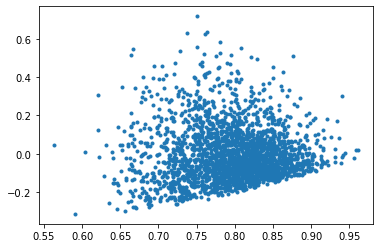

In [285]:
plt.plot(y_pred, (y_pred - y_test) ,".")

In [286]:
# is this distribution normal-distributed?

### plot predicted values against actual values

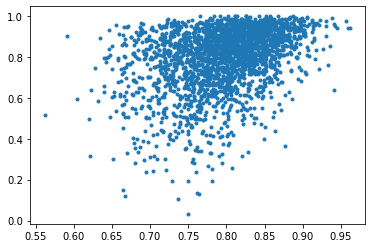

In [287]:
plt.plot(y_pred, y_test ,".")

#### compare to prediction of values that model was trained on

In [294]:
y_pred_train = reg.predict(X_train)

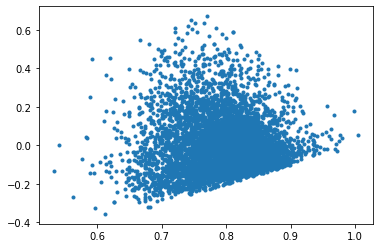

In [295]:
plt.plot(y_pred_train, y_pred_train - y_train ,".")

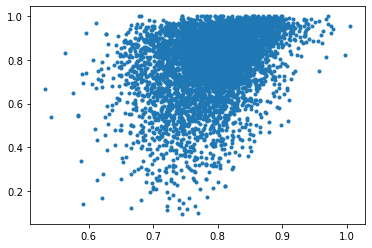

In [296]:
plt.plot(y_pred_train, y_train ,".")

Model overall seems to make better prediction for higher scores, which is unsurprising, as score histograms shows that most score are between 0.7-1.0 -> model is trained on a lot of data with scores in that interval, therefore makes better predictions for data with scores in that interval??

In [297]:
# try removing outliers from train dataset?

## greedy approach

In [160]:
# for unkown reasons the explainder variance is better than in the greedy approach ?

In [177]:
def best_fit_indices_greedy(df, IVs=df.columns[1:-1]):
    # function greedily adds variable which yield best improvement of explained variance
    # stops when adding any unused variable only deteriorates explained variance
    unused_IVs = IVs
    good_IVs =[]
    improvement_possible=True
    best_explainded_var = 0
    while(improvement_possible==True):
        best_improvement_var = ""
        temp_best_explained_variance = np.NINF
        for var in unused_IVs:
            X_train, X_test, y_train, y_test = train_test_split(df[np.union1d(good_IVs,var)],df["score"] , test_size=0.3, random_state=42)
            reg = LinearRegression().fit(X_train, y_train)
            y_pred = reg.predict(X_test)
            new_explained_var = explained_variance_score(y_test, y_pred)
            #print("explained_var_diff: {} for variable: {}".format(temp_best_explained_variance - new_explained_var, var))
            
            
            #if variable improves explained variances save improvement that adding this variable would bring
            if new_explained_var > temp_best_explained_variance:
                    #print("momentarily best variable to add: {}".format(var))
                    temp_best_explained_variance = new_explained_var
                    best_improvement_var = var
                    
            else:
                pass
        #print(temp_best_explained_variance)
        if  temp_best_explained_variance > best_explainded_var:
            good_IVs.append(best_improvement_var)
            #print(good_IVs)
            #print("variable list after for-loop: {}".format(good_IVs))
            best_explained_var = temp_best_explained_variance
            del_idx = np.where(unused_IVs==best_improvement_var)[0]
            unused_IVs = np.delete(unused_IVs, del_idx)
            
            
        # if no further improvement possible, quit function  
        else:
            improvement_possible=False
    
    return good_IVs

In [178]:
good_regressors = best_fit_indices_greedy(df)

momentarily best variable to add: required_age
momentarily best variable to add: Strategy
momentarily best variable to add: Casual
momentarily best variable to add: Indie
momentarily best variable to add: Steam Cloud
momentarily best variable to add: required_age
momentarily best variable to add: Strategy
momentarily best variable to add: Casual
momentarily best variable to add: Downloadable Content
momentarily best variable to add: required_age
momentarily best variable to add: Strategy
momentarily best variable to add: release_year
momentarily best variable to add: required_age
momentarily best variable to add: Violent
momentarily best variable to add: Strategy
momentarily best variable to add: required_age
momentarily best variable to add: RPG
momentarily best variable to add: Casual
momentarily best variable to add: required_age
momentarily best variable to add: Violent
momentarily best variable to add: RPG
momentarily best variable to add: Simulation
momentarily best variable to a

momentarily best variable to add: MMO
momentarily best variable to add: required_age
momentarily best variable to add: LAN Co-op
momentarily best variable to add: VR Only
momentarily best variable to add: Steam Achievements
momentarily best variable to add: Partial Controller Support
momentarily best variable to add: required_age
momentarily best variable to add: LAN Co-op
momentarily best variable to add: VR Only
momentarily best variable to add: Steam Achievements
momentarily best variable to add: required_age
momentarily best variable to add: LAN Co-op
momentarily best variable to add: VR Only
momentarily best variable to add: required_age
momentarily best variable to add: LAN Co-op
momentarily best variable to add: Shared/Split Screen Co-op
momentarily best variable to add: required_age
momentarily best variable to add: LAN Co-op
momentarily best variable to add: Co-op
momentarily best variable to add: required_age
momentarily best variable to add: LAN Co-op
momentarily best variab

In [263]:
good_regressors

['Steam Cloud',
 'Downloadable Content',
 'release_year',
 'Strategy',
 'Casual',
 'Remote Play on Tablet',
 'Includes level editor',
 'Simulation',
 'In-App Purchases',
 'RPG',
 'Steam Trading Cards',
 'linux',
 'Valve Anti-Cheat enabled',
 'Indie',
 'Action',
 'Massively Multiplayer',
 'Steam Leaderboards',
 'Additional High-Quality Audio',
 'Includes Source SDK',
 'LAN PvP',
 'Racing',
 'Remote Play Together',
 'Steam Turn Notifications',
 'Adventure',
 'Commentary available',
 'Remote Play on TV',
 'Captions available',
 'Violent',
 'Sexual Content',
 'Nudity',
 'Multi-player',
 'Shared/Split Screen',
 'PvP',
 'Online PvP',
 'Free to Play',
 'windows',
 'Education',
 'Mods',
 'Remote Play on Phone',
 'Steam Workshop',
 'SteamVR Collectibles',
 'MMO',
 'Partial Controller Support',
 'Steam Achievements',
 'VR Only',
 'Shared/Split Screen Co-op',
 'Co-op',
 'LAN Co-op',
 'required_age',
 'VR Support',
 'Full controller support',
 'Stats',
 'Gore',
 'Early Access',
 'Tracked Controlle

In [ ]:
## fig regression with new best regressors

In [288]:
X_train, X_test, y_train, y_test = train_test_split(df[good_regressors],df["score"] , test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
explained_var = explained_variance_score(y_test, y_pred)

In [289]:
explained_var

0.12398527728597697

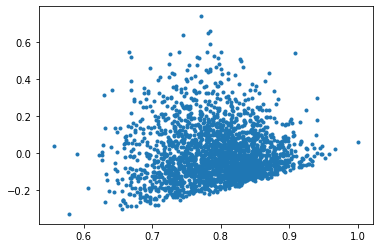

In [280]:
plt.plot(y_pred, (y_pred - y_test) ,".")

In [290]:
## plotting predicted values against actual values

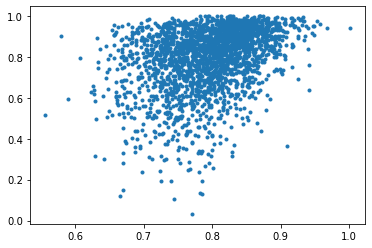

In [282]:
plt.plot(y_pred,  y_test ,".")

In [277]:
# preliminiary conclusion: Model tends to overestimate score of games

## check which variable has biggest effect on MSE

## get error when all variables are included

In [49]:
df.columns

Index(['index', 'required_age', 'price', 'Violent', 'Education',
       'Sexual Content', 'Strategy', 'Nudity', 'RPG', 'Free to Play', 'Racing',
       'Gore', 'Adventure', 'Action', 'Sports', 'Casual',
       'Massively Multiplayer', 'Simulation', 'Indie', 'Early Access',
       'LAN Co-op', 'Co-op', 'VR Only', 'Downloadable Content',
       'Remote Play on Tablet', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'VR Supported', 'Online PvP',
       'Remote Play on Phone', 'Steam Turn Notifications',
       'Steam Achievements', 'Steam Trading Cards', 'Stats',
       'Commentary available', 'Remote Play on TV',
       'Shared/Split Screen Co-op', 'Single-player',
       'Additional High-Quality Audio', 'Valve Anti-Cheat enabled',
       'Shared/Split Screen PvP', 'Remote Play Together',
       'Remote Play auf Tablets', 'PvP', 'Includes level editor',
       'SteamVR Collectibles', 'Online Co-op', 'MMO', 'Captions available',
       'VR Support', 'Multi-player', 'Includes S

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1],df["score"] , test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_rmse_full = np.sqrt(mean_squared_error(y_test, y_pred))
explained_var_full = explained_variance_score(y_test, y_pred)

In [78]:
reg_rmse_full, explained_var_full

(0.14338957076964098, 0.12398527728598407)

### get all possible combinations where one variable is missing

In [210]:
column_indices = list(range(1,len(df.columns)-1))

In [211]:
df.columns[column_indices]

Index(['required_age', 'price', 'Violent', 'Education', 'Sexual Content',
       'Strategy', 'Nudity', 'RPG', 'Free to Play', 'Racing', 'Gore',
       'Adventure', 'Action', 'Sports', 'Casual', 'Massively Multiplayer',
       'Simulation', 'Indie', 'Early Access', 'LAN Co-op', 'Co-op', 'VR Only',
       'Downloadable Content', 'Remote Play on Tablet', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'VR Supported', 'Online PvP',
       'Remote Play on Phone', 'Steam Turn Notifications',
       'Steam Achievements', 'Steam Trading Cards', 'Stats',
       'Commentary available', 'Remote Play on TV',
       'Shared/Split Screen Co-op', 'Single-player',
       'Additional High-Quality Audio', 'Valve Anti-Cheat enabled',
       'Shared/Split Screen PvP', 'Remote Play Together', 'PvP',
       'Includes level editor', 'SteamVR Collectibles', 'Online Co-op', 'MMO',
       'Captions available', 'VR Support', 'Multi-player',
       'Includes Source SDK', 'Tracked Controller Support', '

In [212]:
H = np.zeros((len(column_indices),len(column_indices)-1))

In [213]:
H.shape

(63, 62)

In [215]:
#column_indices

In [216]:
H[:] = np.array(range(1,len(df.columns)-1)).reshape(-1,1)

In [217]:
H = H.T

In [218]:
# create array of indices where always one variable is missing:
H = np.sort(H.reshape(len(column_indices),len(column_indices)-1))

In [219]:
#df.columns[18:]

In [221]:
for j in H:
    print(j)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 63.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 62. 63.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 6

### perform regression for all combinations, find out for which variable the difference in MSE is biggest compared to regression with all variables included

In [222]:
Diff = np.ones(H.shape[0])
Diff_r2 = np.ones(H.shape[0])

In [223]:
max_differece = np.NINF
max_idx =0
min_difference = np.Inf
min_idx = 0
for idx, indices in enumerate(H):
    #print(np.setdiff1d(column_indices, H[idx][-1::-1]))
    #print(np.setdiff1d(column_indices, indices))
    # do linear regression
    #print(indices)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,indices],df["score"] , test_size=0.3, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #r2 = r2_score(y_test, y_pred)
    var_idx = np.setdiff1d(column_indices, indices)[0]
    print(var_idx)
    print("MSE: {}, name of missing variable: {}".format(reg_rmse, df.columns[var_idx]))
    #print(r2)
    
    # caclculate biggest difference in MSE of one missing variables compared to model with all variables.
    
    # calculate error of model with all variables - model with one missing variable
    Diff[idx] = reg_rmse_full- reg_rmse
    #Diff_r2[idx] = r2_full - r2
    
    #if error is positive, full model is worse than model with one variable removed.
    if Diff[idx] > max_differece:
        max_differece=Diff[idx]
        max_idx = var_idx
       
    
    # if error is negative, model with one variable removed is worse compared to full model
    if Diff[idx] < min_difference:
        min_difference=Diff[idx]
        min_idx = var_idx
        
        
    
    


63
MSE: 0.1443405739413735, name of missing variable: release_year
62
MSE: 0.14328431215163404, name of missing variable: mac
61
MSE: 0.14339210164737942, name of missing variable: windows
60
MSE: 0.14344920367159503, name of missing variable: linux
59
MSE: 0.14338892541830883, name of missing variable: Steam Workshop
58
MSE: 0.14339916888468196, name of missing variable: In-App Purchases
57
MSE: 0.1434098073795813, name of missing variable: Shared/Split Screen
56
MSE: 0.1433442166185582, name of missing variable: Full controller support
55
MSE: 0.1433921413078236, name of missing variable: Partial Controller Support
54
MSE: 0.14342039547660834, name of missing variable: LAN PvP
53
MSE: 0.14338957076964098, name of missing variable: Mods
52
MSE: 0.1443831509955502, name of missing variable: Steam Cloud
51
MSE: 0.14339913431190718, name of missing variable: Tracked Controller Support
50
MSE: 0.14343637199289583, name of missing variable: Includes Source SDK
49
MSE: 0.14350738906348823, 

In [224]:
max_differece

0.0001136372421309817

In [225]:
min_difference

-5015974.008907121

In [226]:
# max difference for Casual as price is already included?

In [304]:
df.columns[max_idx]

'Online Co-op'

In [305]:
df.columns[min_idx]

'price'

## compare histograms conditioned on Valve Anti cheat

In [229]:
#df.loc[df['Valve Anti-Cheat enabled'] == 1]["score"]

Text(0.5, 1.0, 'Casual=0')

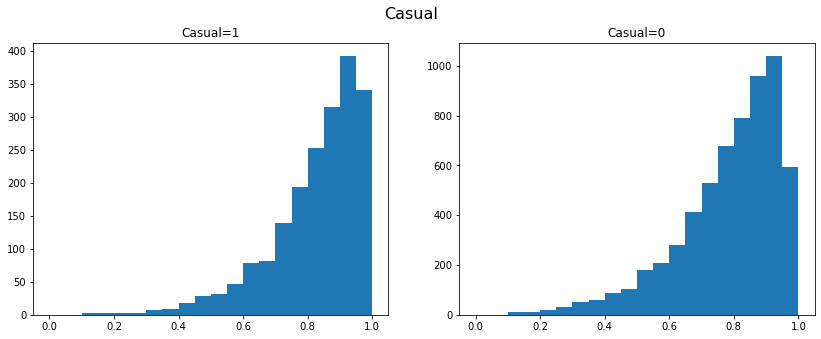

In [97]:
bins = np.linspace(0,1,21)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
fig.suptitle('Casual', fontsize=16)
ax1.hist(df.loc[df['Casual'] == 1]["score"],bins)
ax2.hist(df.loc[df['Casual'] == 0]["score"],bins)
ax1.set_title("Casual=1")
ax2.set_title("Casual=0")

Text(0.5, 1.0, 'Downloadable Content=0')

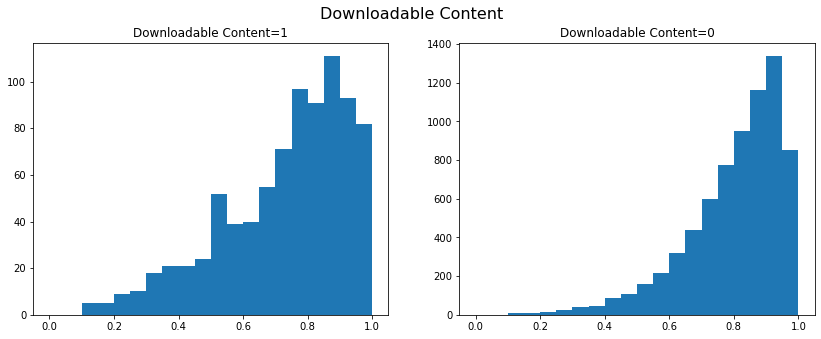

In [98]:
bins = np.linspace(0,1,21)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
fig.suptitle('Downloadable Content', fontsize=16)
ax1.hist(df.loc[df['Downloadable Content'] == 1]["score"],bins)
ax2.hist(df.loc[df['Downloadable Content'] == 0]["score"],bins)
ax1.set_title("Downloadable Content=1")
ax2.set_title("Downloadable Content=0")

# try comparing all histograms conditioned on all categorical variables:

C:\Users\Marco\AppData\Local\Temp/ipykernel_6148/213838787.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))


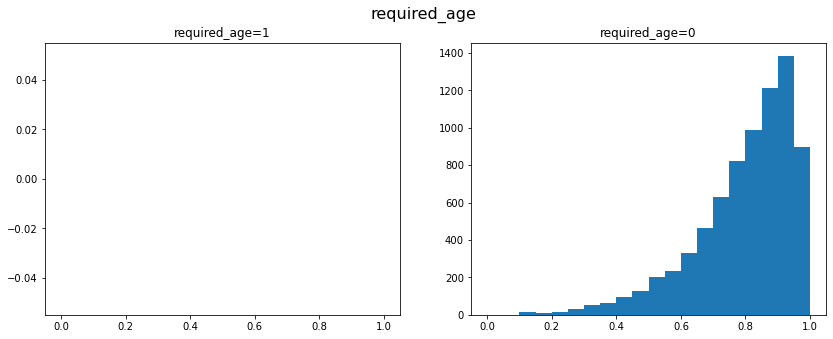

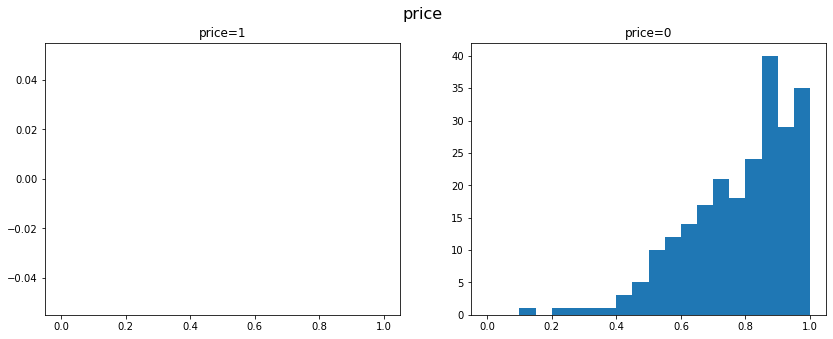

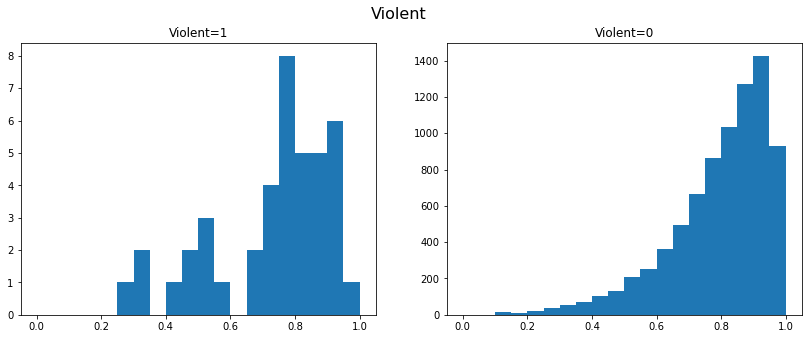

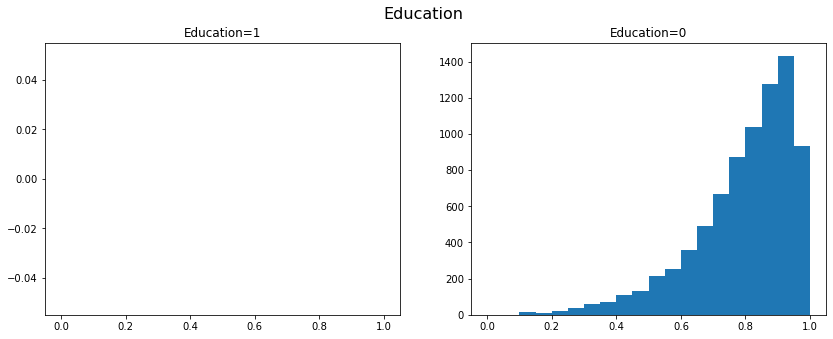

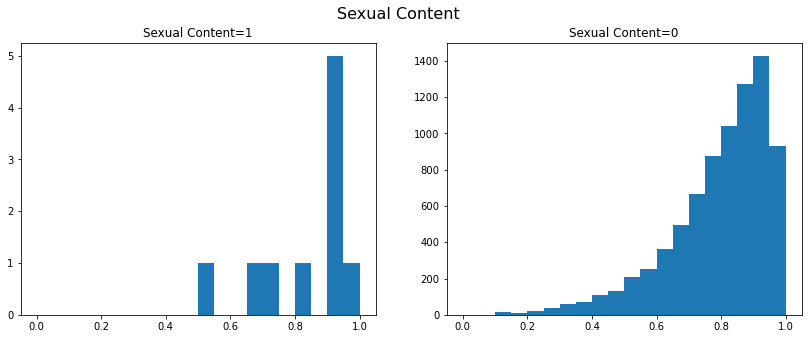

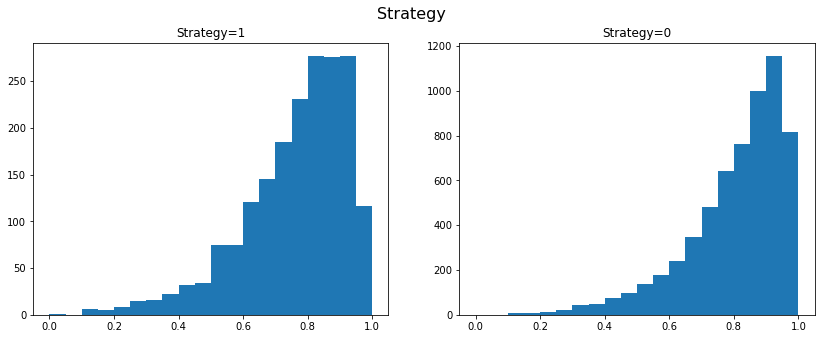

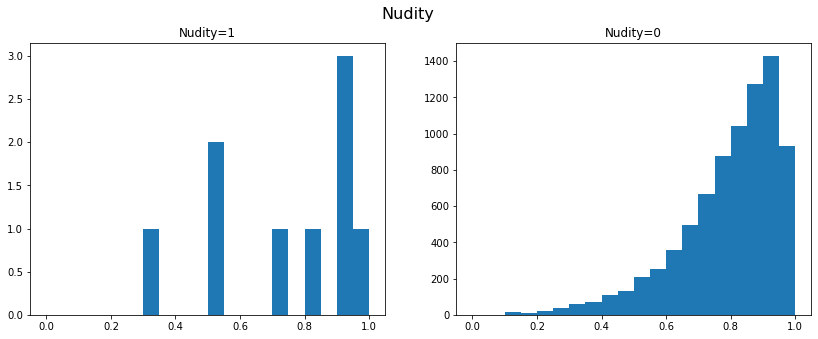

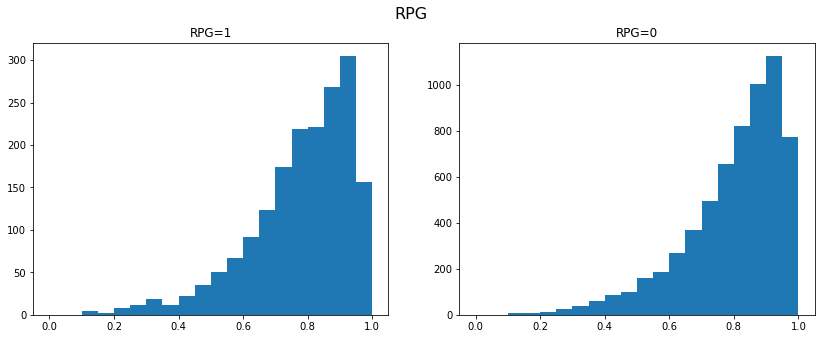

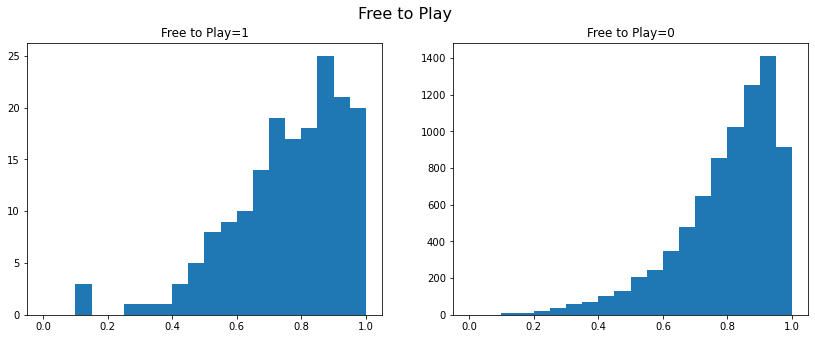

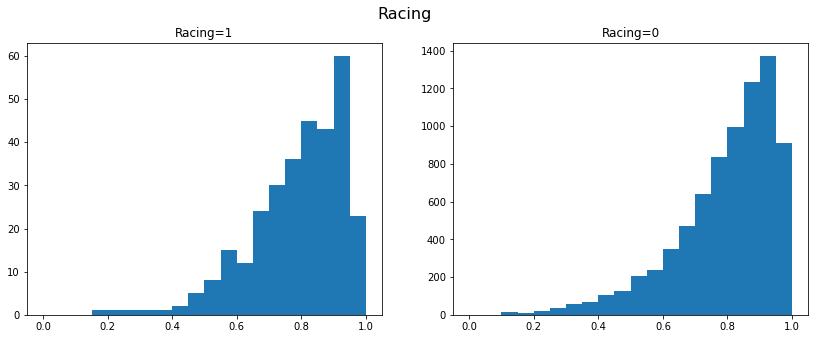

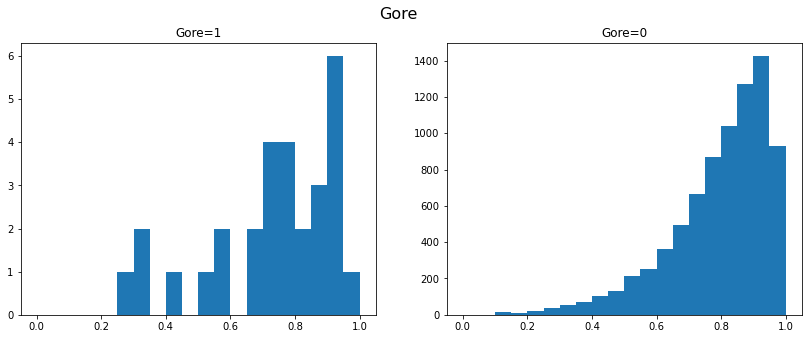

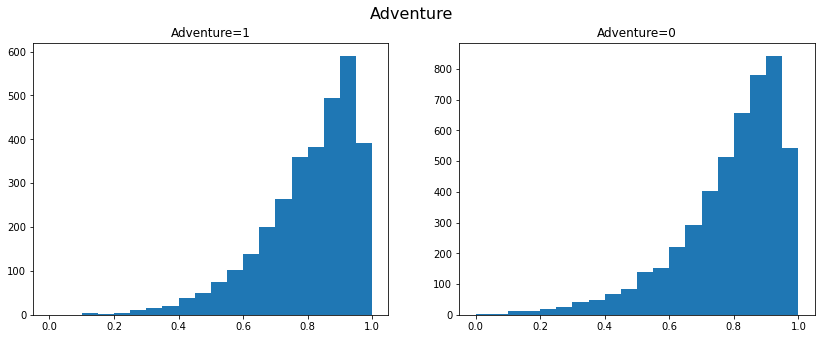

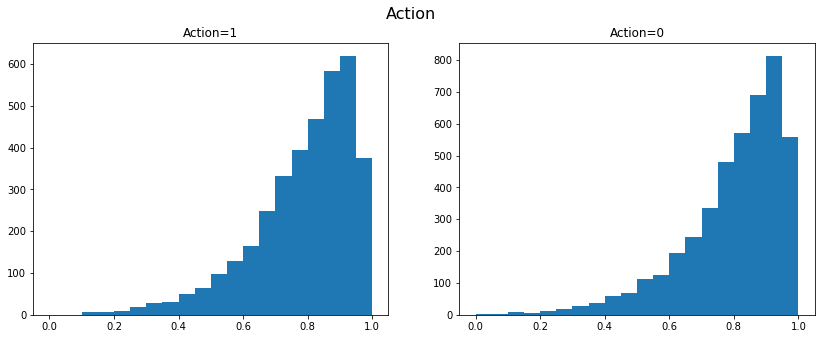

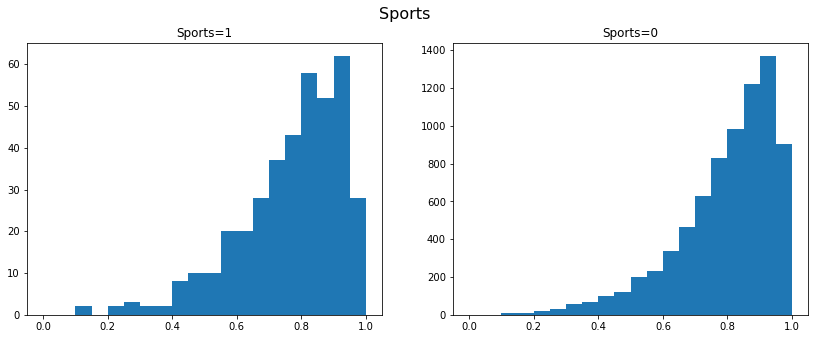

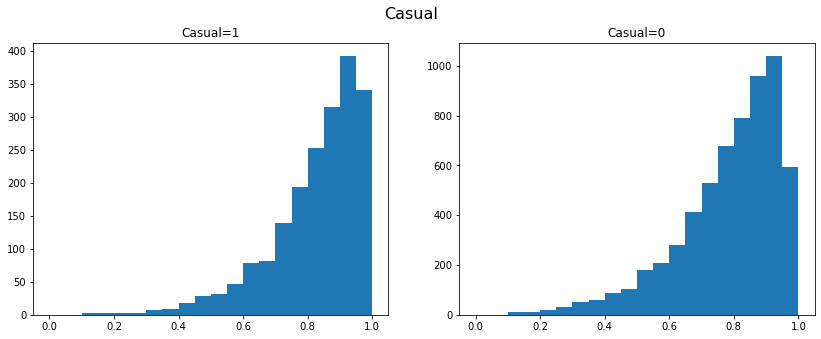

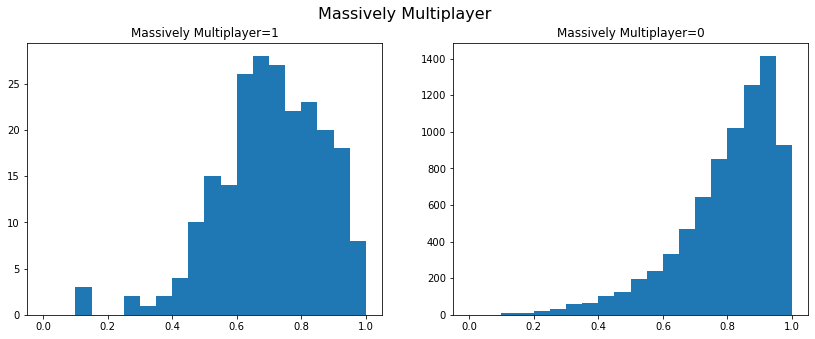

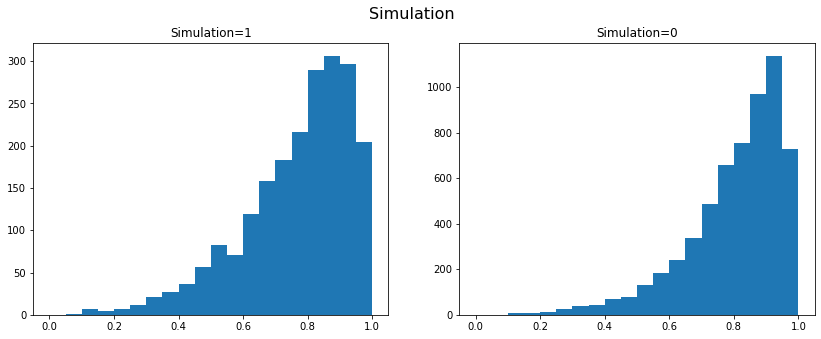

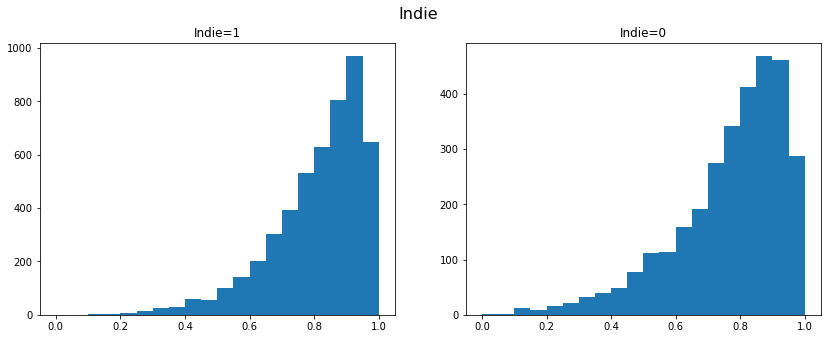

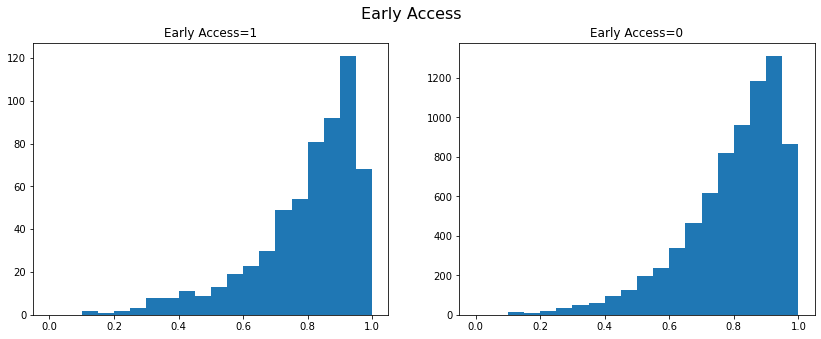

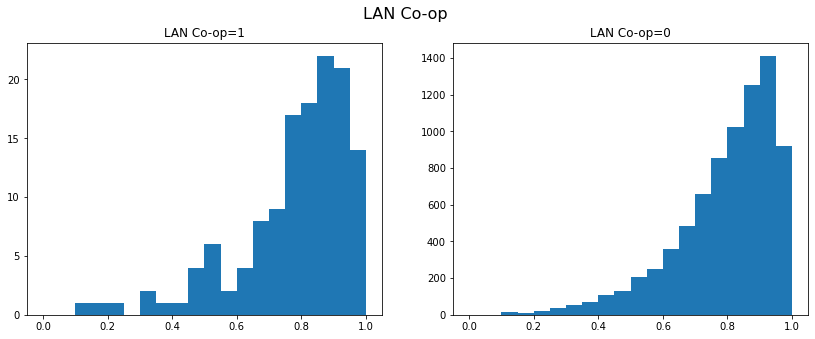

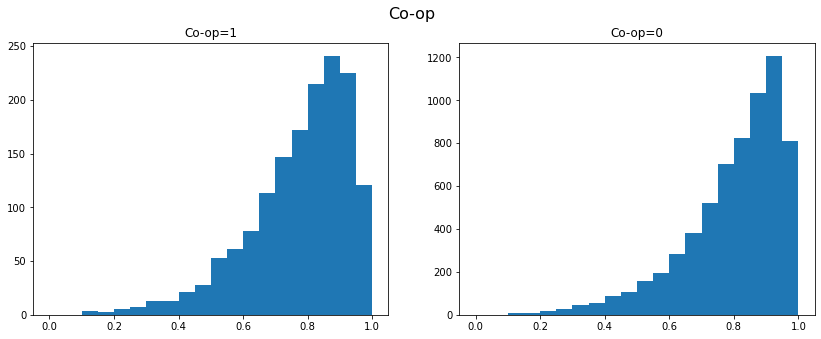

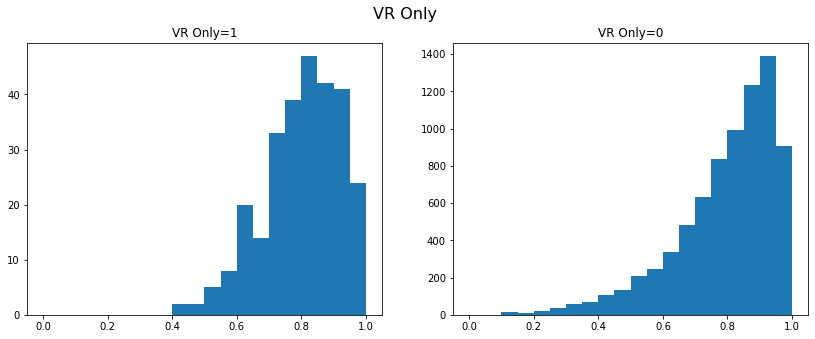

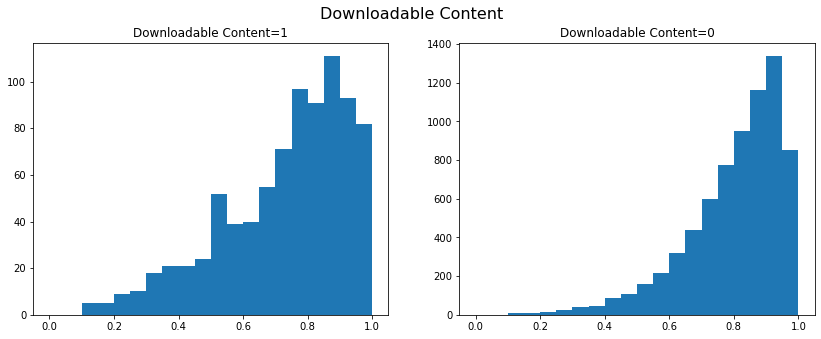

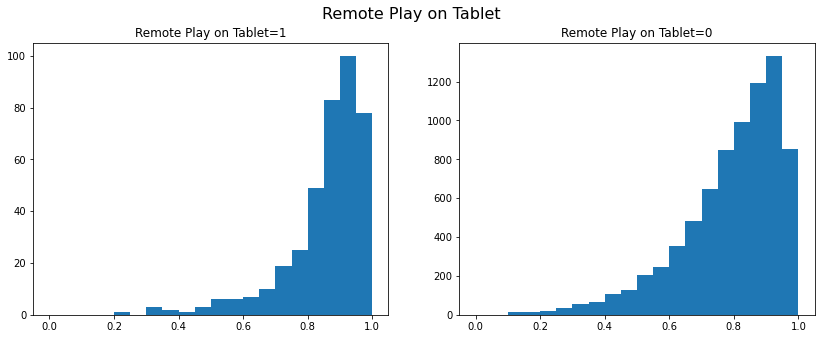

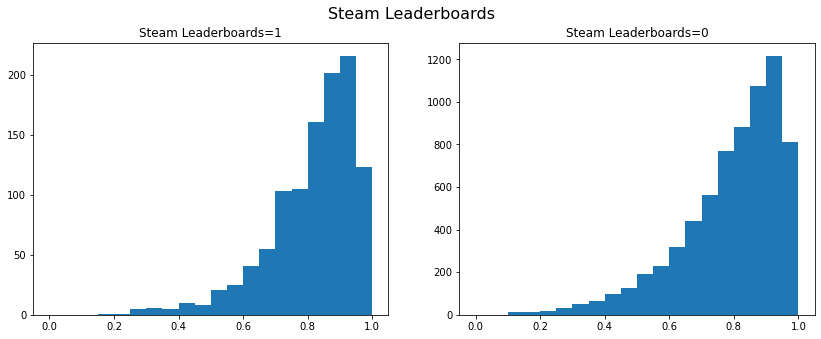

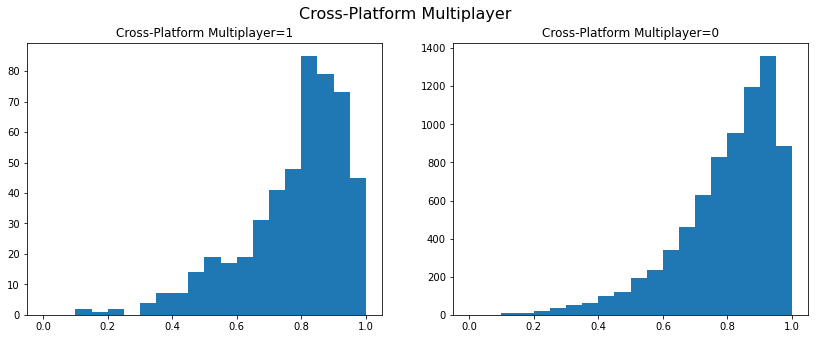

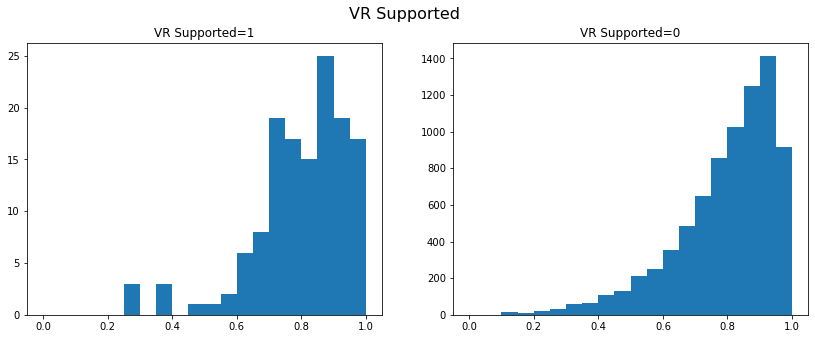

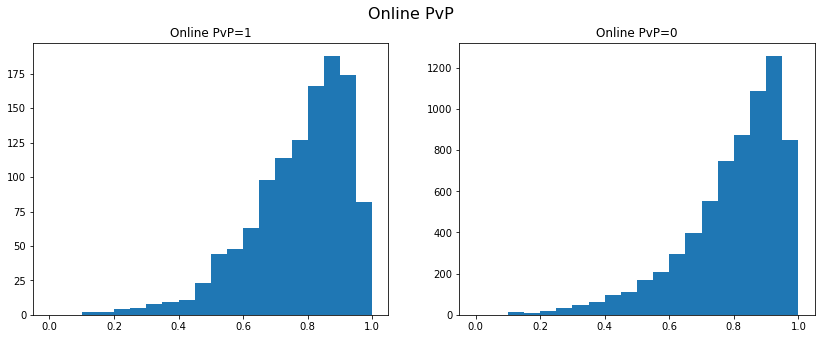

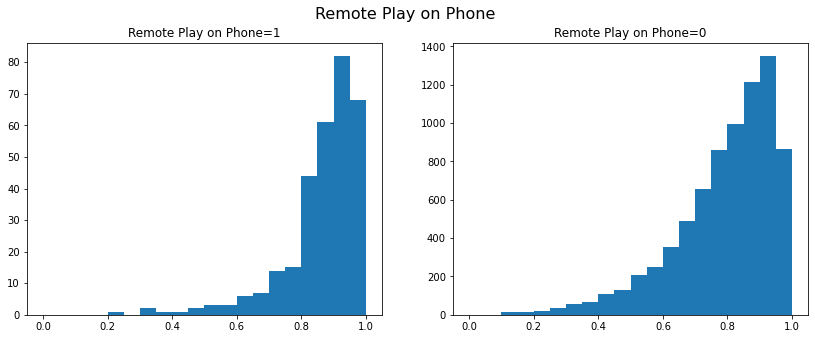

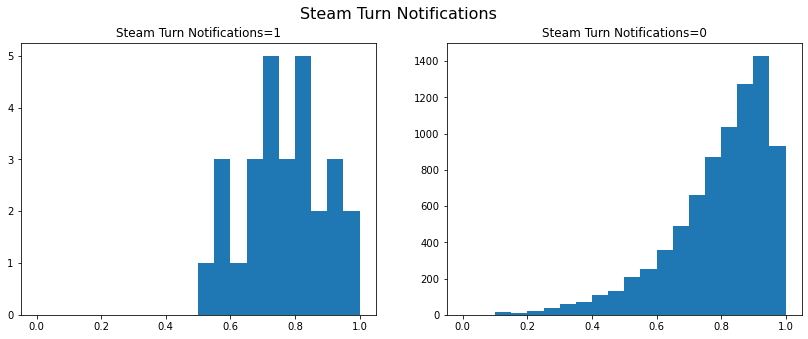

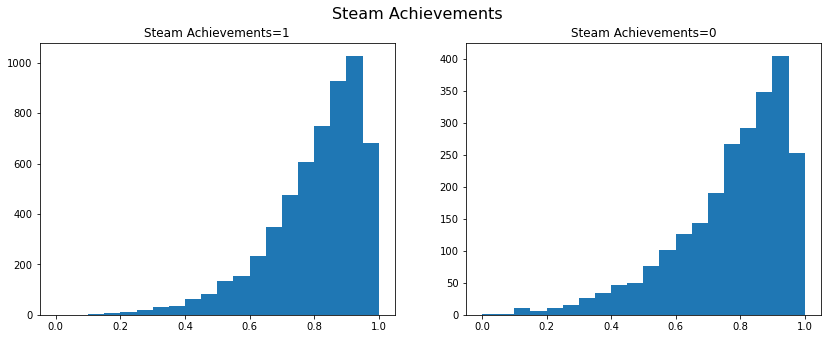

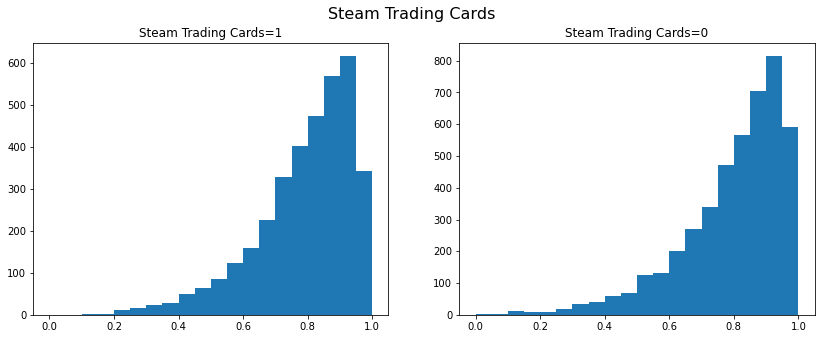

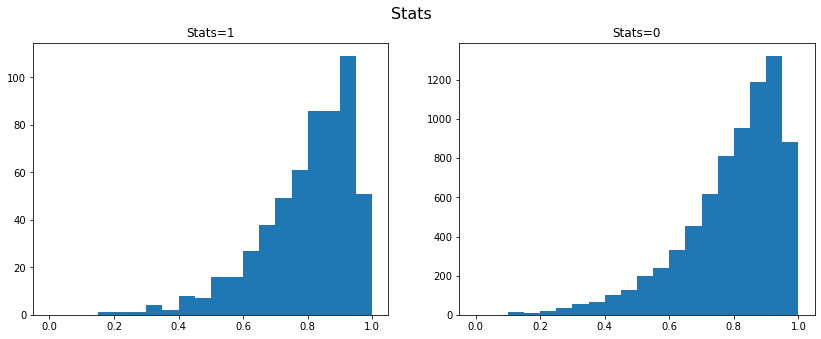

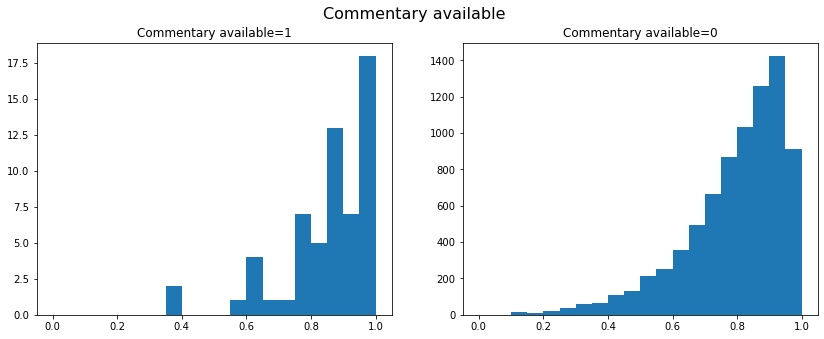

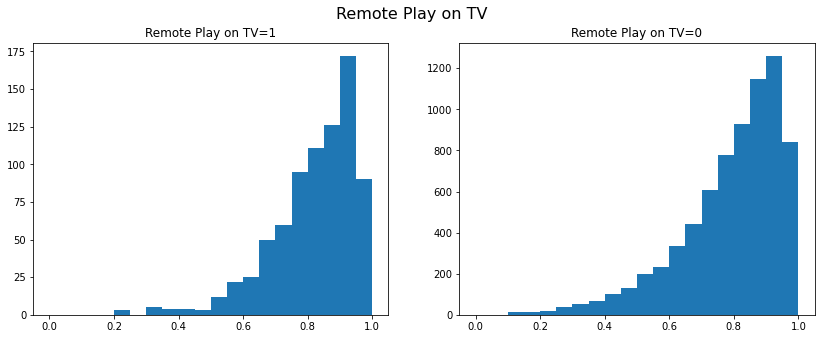

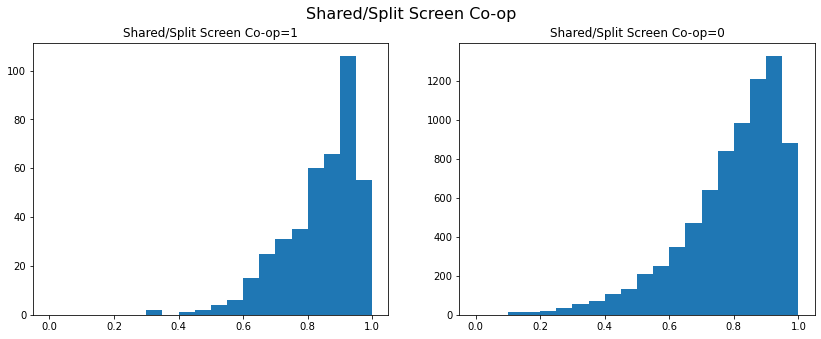

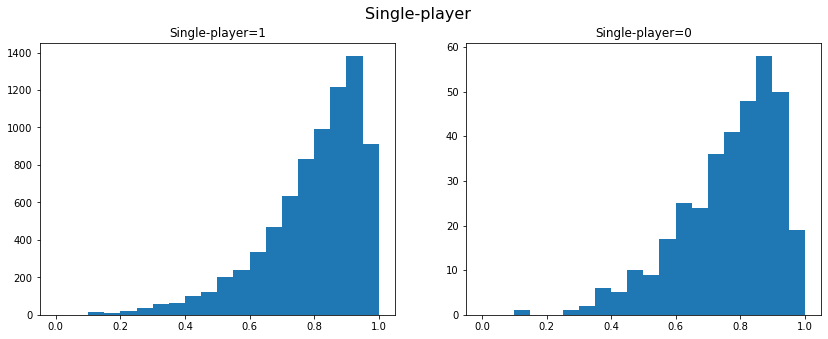

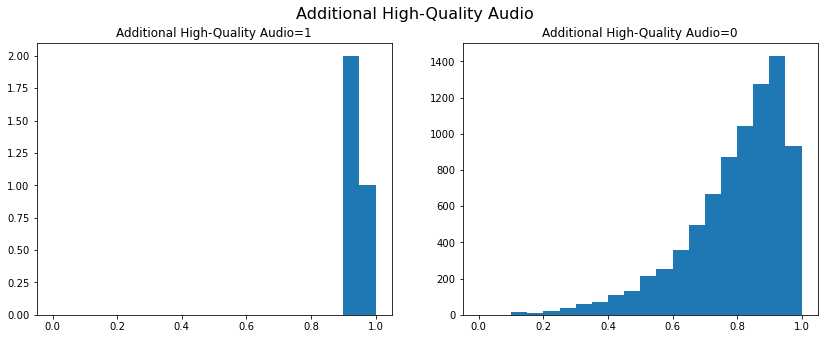

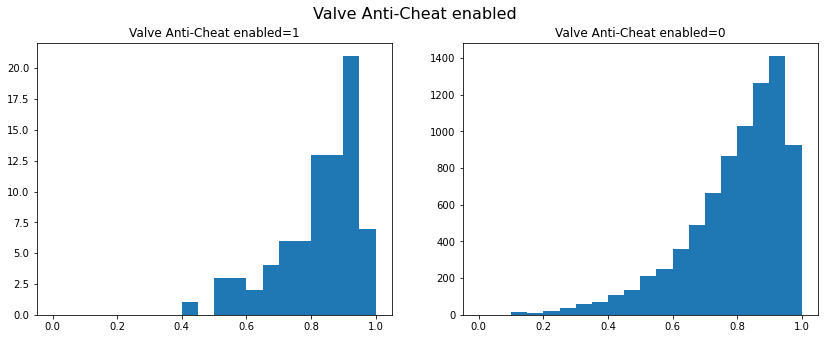

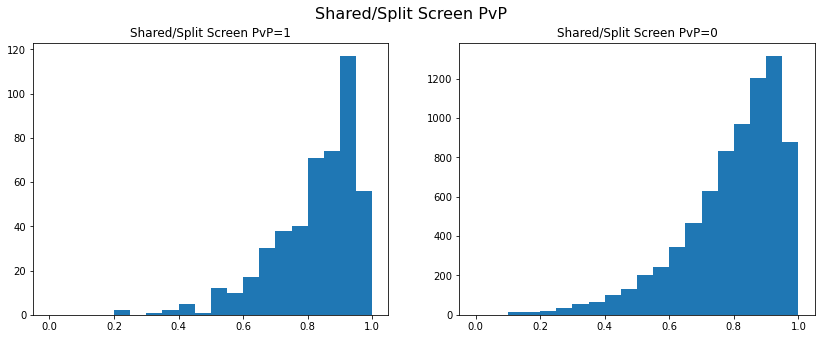

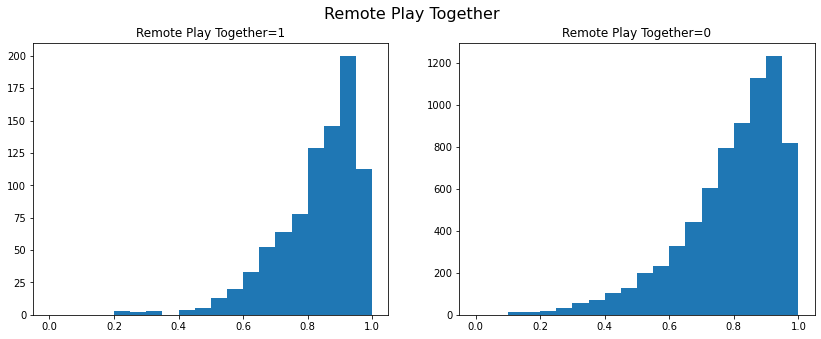

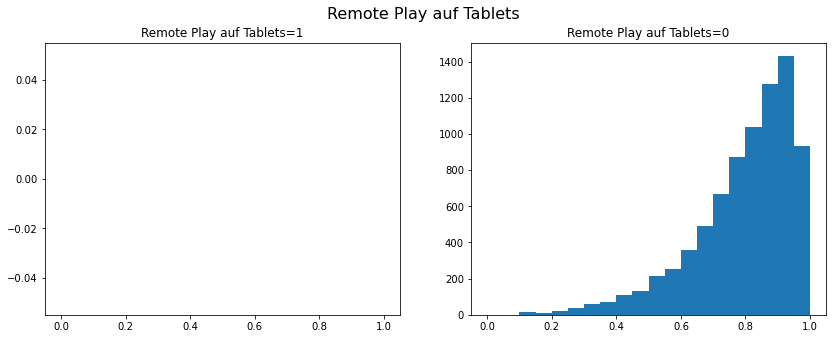

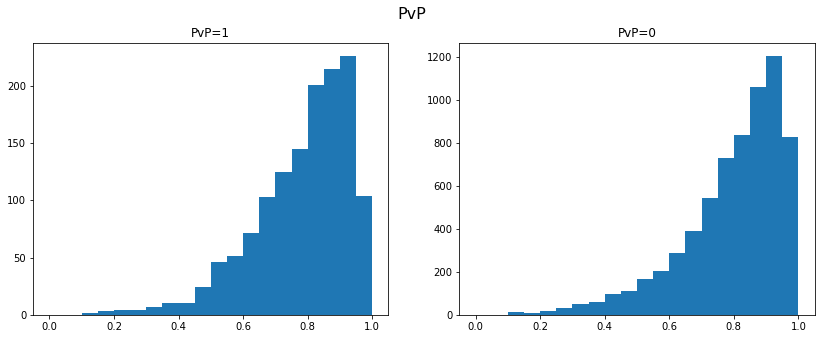

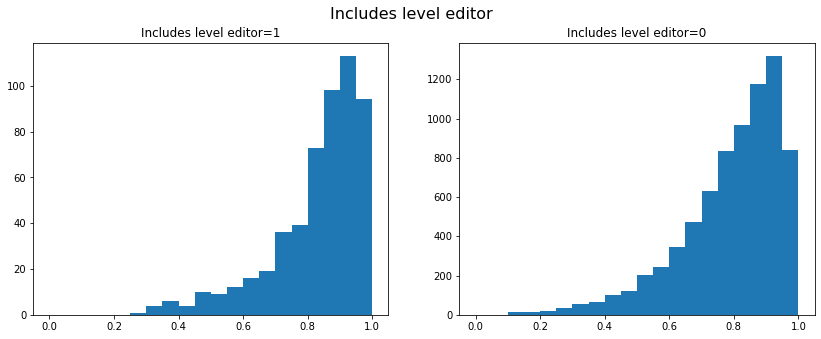

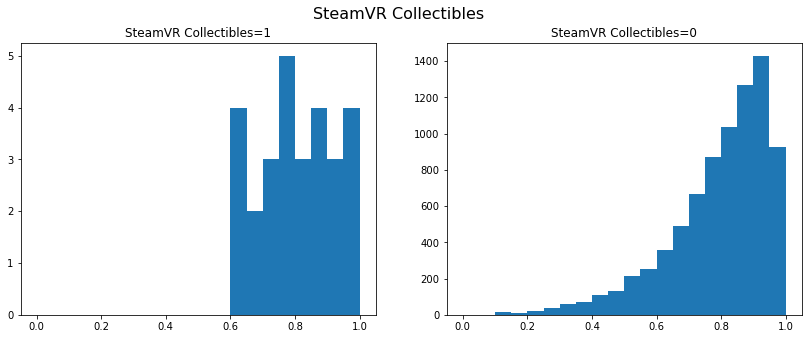

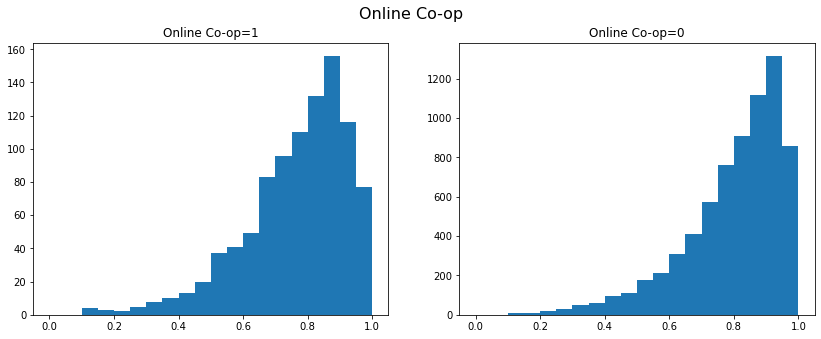

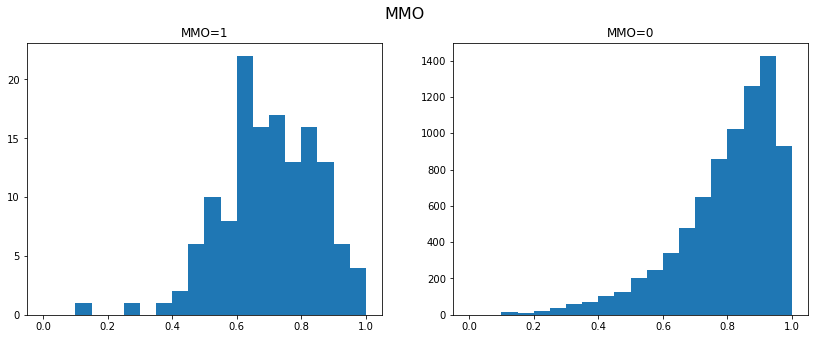

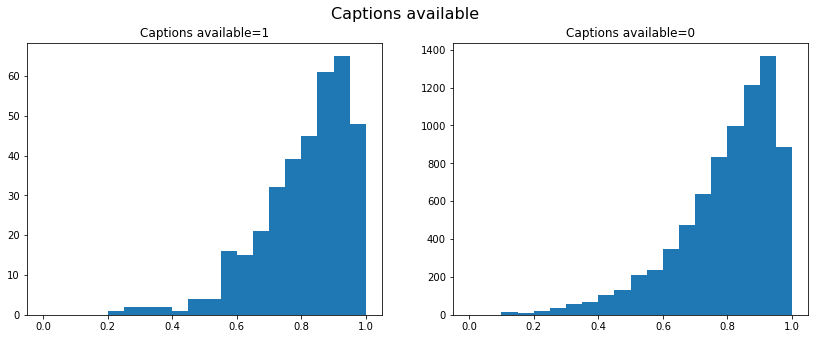

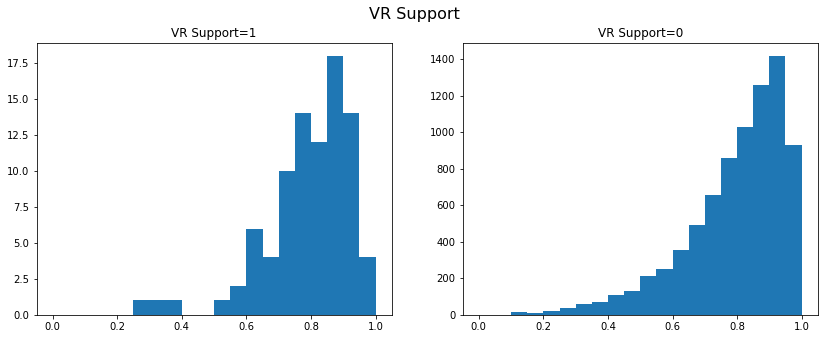

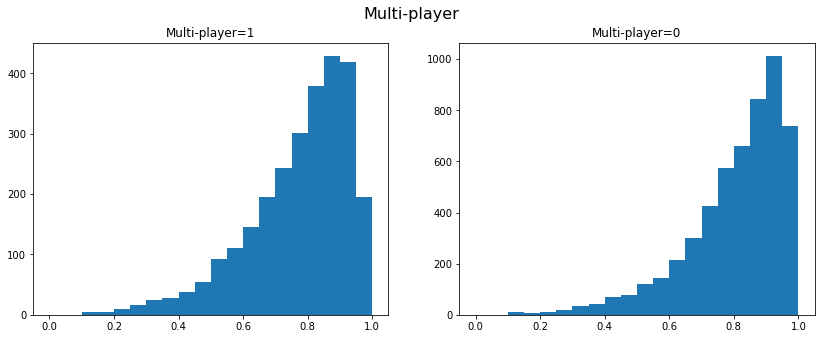

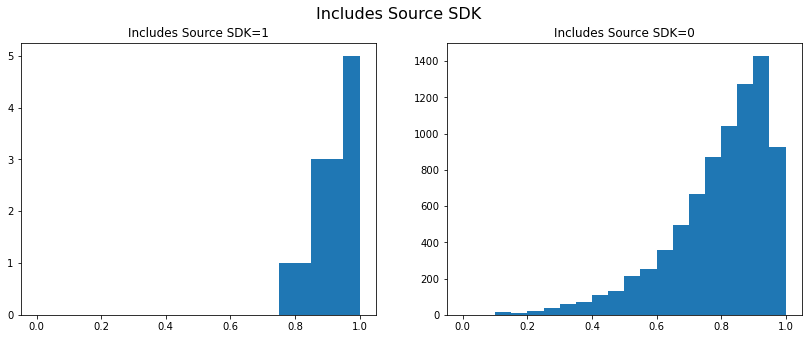

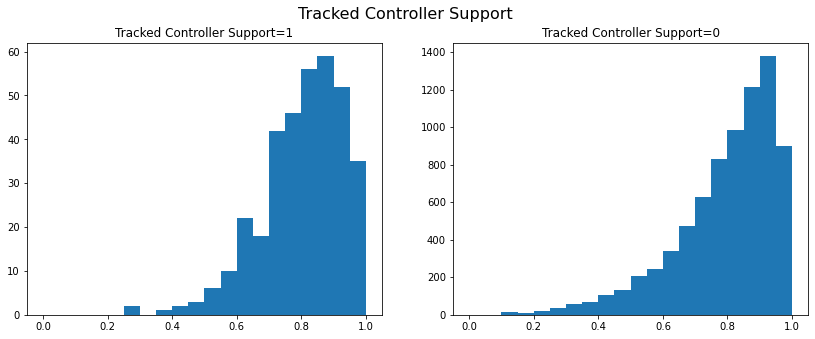

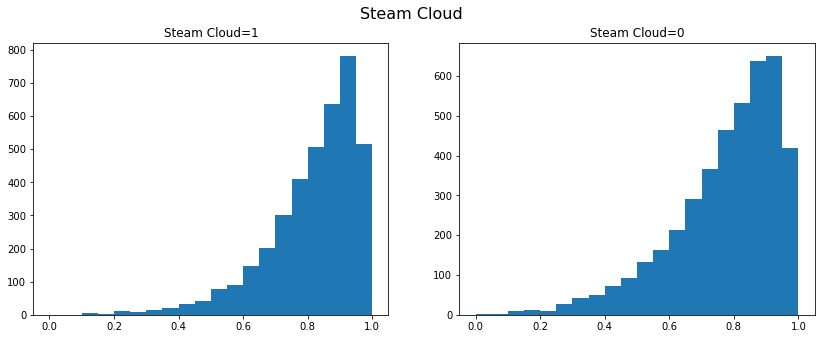

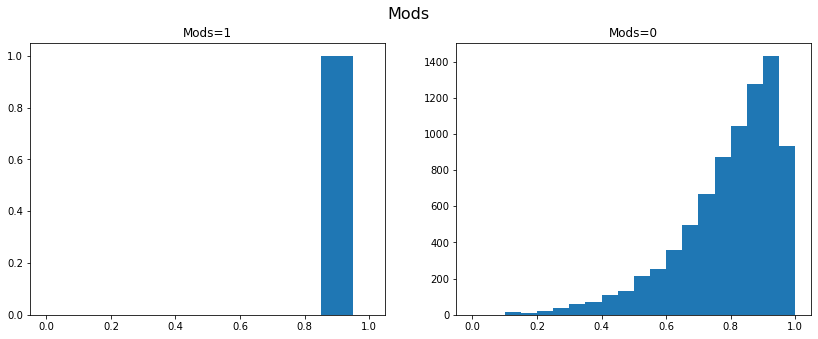

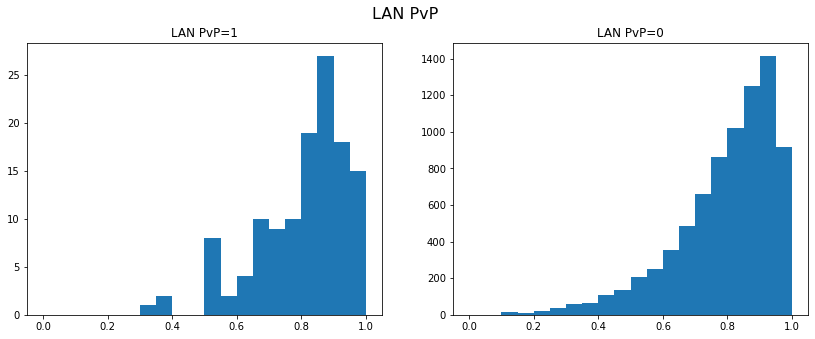

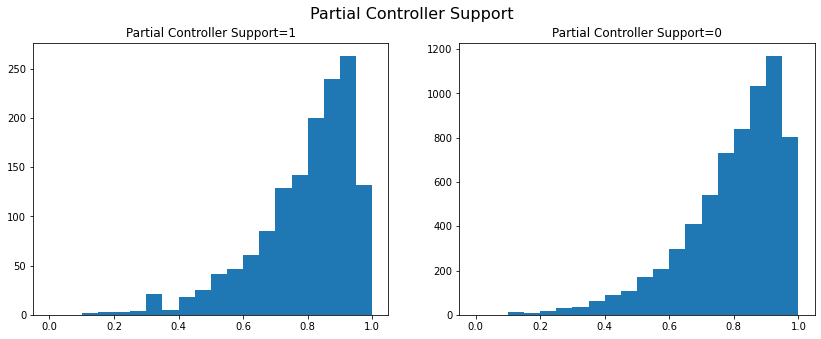

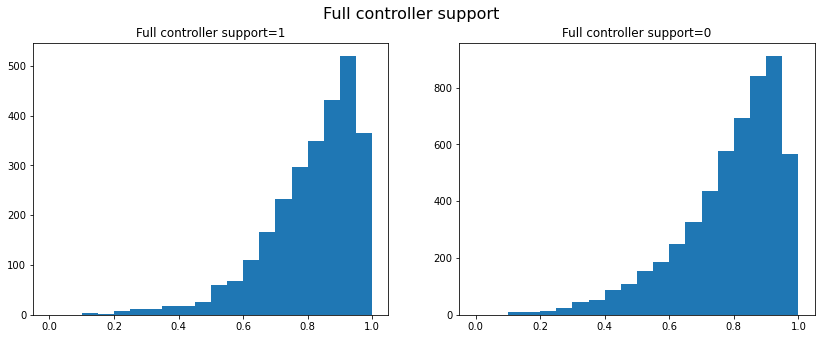

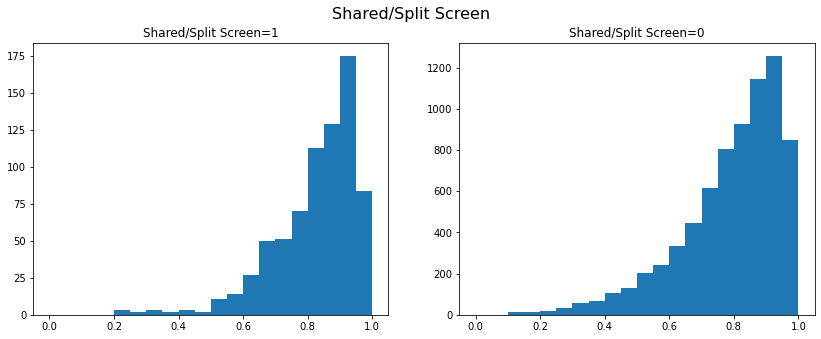

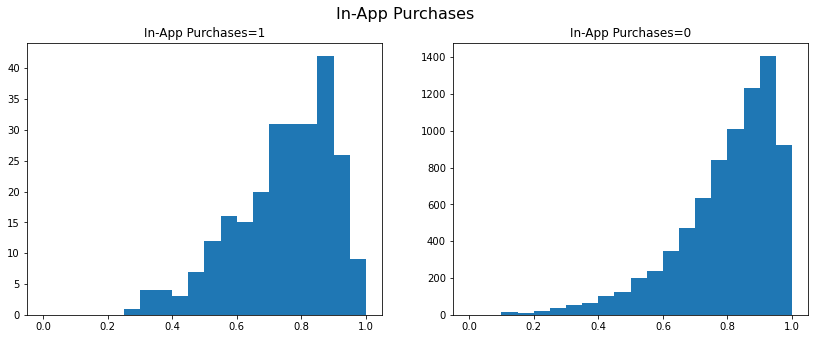

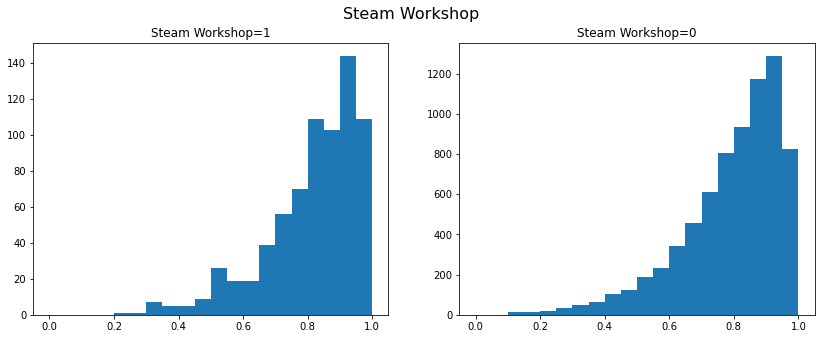

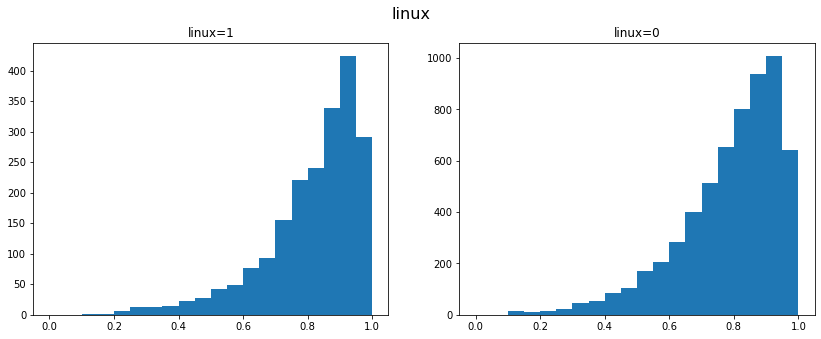

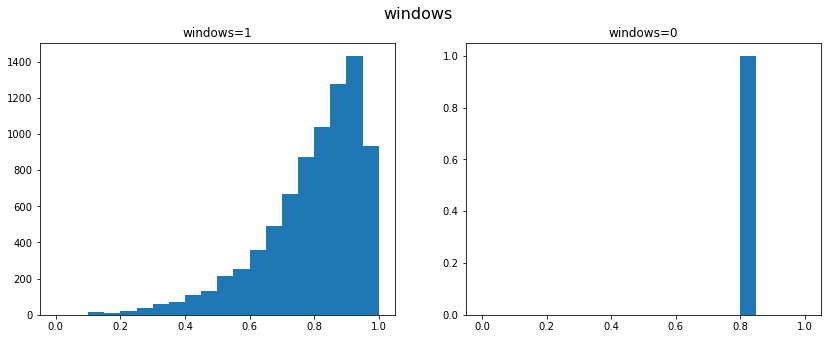

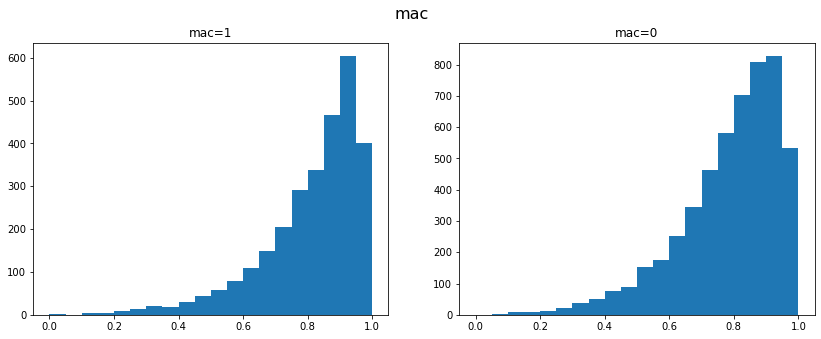

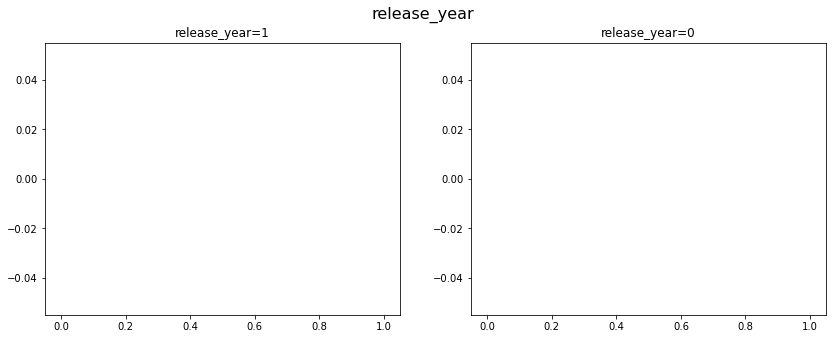

In [99]:
for idx in range(1, len(df.columns)-1):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
    fig.suptitle(df.columns[idx], fontsize=16)
    ax1.hist(df.loc[df.iloc[:,idx] == 1]["score"],bins)
    ax2.hist(df.loc[df.iloc[:,idx] == 0]["score"],bins)
    ax1.set_title(df.columns[idx]+"=1")
    ax2.set_title(df.columns[idx]+"=0")

comparing train and test set?

# perform t test for each variable to see if it has  significant impact

In [231]:
import scipy

In [ ]:
#t = scipy.stats.ttest_ind(df.loc[df.iloc[:,idx] == 0]["score"], df.loc[df.iloc[:,idx] == 1]["score"])

In [232]:
#t[1]

In [233]:
for idx in range(1, len(df.columns)-1):
    t = scipy.stats.ttest_ind(df.loc[df.iloc[:,idx] == 0]["score"], df.loc[df.iloc[:,idx] == 1]["score"])
    print("Variable: {}, p-value: {}\n".format(df.columns[idx], t[1]))
    

Variable: required_age, p-value: nan

Variable: price, p-value: nan

Variable: Violent, p-value: 0.008164159112794713

Variable: Education, p-value: nan

Variable: Sexual Content, p-value: 0.3863191661675417

Variable: Strategy, p-value: 4.0119833319397616e-28

Variable: Nudity, p-value: 0.35682626551807384

Variable: RPG, p-value: 6.2334940373990575e-06

Variable: Free to Play, p-value: 0.0014066547334436027

Variable: Racing, p-value: 0.5823170377177753

Variable: Gore, p-value: 0.021929453370819335

Variable: Adventure, p-value: 0.00032758949754307346

Variable: Action, p-value: 0.00015745399449533412

Variable: Sports, p-value: 0.00039735013204728644

Variable: Casual, p-value: 1.4032403621318208e-23

Variable: Massively Multiplayer, p-value: 7.627809994546919e-19

Variable: Simulation, p-value: 1.7364589178485437e-20

Variable: Indie, p-value: 3.8436057075591195e-32

Variable: Early Access, p-value: 0.9148131362610666

Variable: LAN Co-op, p-value: 0.28221354438453466

Variable: C

C:\Users\Marco\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Marco\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


At first glance, contrary to our expectation MMOs seem to be rated a bit worse on average. On the other hand PVP games seem to be rated a bit better.

In [ ]:
for indices in H:
    

# try achieving less error with NN

In [ ]:
torch.from_numpy(np.array(df.iloc[1,18:-1],dtype=np.int16))

tensor([399,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          1,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   1,   0,   0,
          0,   1,   0,   0], dtype=torch.int16)

In [ ]:
df["score"].iloc[0]

0.9550321199143469

In [234]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage import io, transform

In [235]:
device = (torch.device('cuda') if torch.cuda.is_available()
else torch.device('cpu'))

In [236]:
class SteamData(Dataset):
    def __init__(self, df):
        super().__init__()
        self.df = df
        self.data_size = len(self.df)
        self.num_variables = len(df.columns[1:-1])
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        IVs = torch.from_numpy(np.array(self.df.iloc[idx,1:-1],dtype=np.double))
        target = torch.from_numpy(np.array(df["score"].iloc[idx], dtype=np.double))
        
        sample = (IVs,target)
        
        #if self.transform:
        #    sample = self.transform(sample)
        return sample

In [237]:
Dataloader_steam = SteamData(df)

In [238]:
BATCHSIZE = 64

In [239]:
generator=torch.Generator().manual_seed(42)

In [240]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(Dataloader_steam, [train_size, test_size], generator =generator)

In [241]:
SteamData_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCHSIZE,
shuffle=True)

SteamData_val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCHSIZE,
shuffle=False)

In [243]:
for IVs, score in SteamData_train_loader:
    print(IVs.shape) 
    print(score.shape)

torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([64, 63])
torch.Size([64])
torch.Size([

In [404]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(63,256)
        self.lin2 = nn.Linear(256,256)
        self.lin3 = nn.Linear(256,256)
        self.lin4 = nn.Linear(256,1)
        
    def forward(self,x):
        out = F.relu(self.lin1(x))
        out = F.relu(self.lin2(out))
        out = F.relu(self.lin3(out))
        out = F.relu(self.lin4(out))
        return out

In [505]:
class NN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(63,256)
        self.lin2 = nn.Linear(256,256)
        self.lin3 = nn.Linear(256,256)
        self.lin4 = nn.Linear(256,1)
        
    def forward(self,x):
        out = F.sigmoid(self.lin1(x))
        out = F.sigmoid(self.lin2(out))
        out = F.sigmoid(self.lin3(out))
        out = F.sigmoid(self.lin4(out))
        return out

In [409]:
model = NN2()

In [410]:
model = model.to(device=device)
model = model.double()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()
model.train()
n_epochs = 100

In [411]:
import datetime

In [479]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    loss_train = np.array(n_epochs)
    loss_val = np.array(n_epochs)
    for epoch in range(1,n_epochs+1):
        model.train()
        total_loss_train = 0
        total_loss_val = 0
        for IV, score in train_loader:
            IV = IV.to(device=device)
            score = score.to(device=device)
            #print(score)
            outputs = model(IV)
            #print(outputs.shape)
            loss_train = loss_fn(outputs.flatten(), score)
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            
            total_loss_train+=loss_train
        
        for IV, score in val_loader:
            with torch.no_grad():
                model.eval()
                IV = IV.to(device=device)
                score = score.to(device=device)
                outputs = model(IV)
                #print(outputs)
                loss_val = loss_fn(outputs.flatten(), score)
                
                total_loss_val+=loss_val
       
            
            

        if epoch ==1 or epoch % 10 == 0:
            print("{} Epoch {}, Training loss {}, Validation Loss: {}".format(
            datetime.datetime.now(), epoch,
            total_loss_train/ len(train_loader), total_loss_val/len(val_loader)))

In [413]:
training_loop(n_epochs, optimizer, model, loss_fn, SteamData_train_loader, SteamData_val_loader)

C:\Users\Marco\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]], device='cuda:0', dtype=torch.float64)
tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
       

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0.9999],
        [0

tensor([[0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0

tensor([[0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0

tensor([[0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0.8629],
        [0

tensor([[0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7916],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0

tensor([[0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7916],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7916],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0

tensor([[0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7916],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0

tensor([[0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7916],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0.7915],
        [0

tensor([[0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7991],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0

tensor([[0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0

tensor([[0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0

tensor([[0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7991],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0

tensor([[0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0.7990],
        [0

tensor([[0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0

tensor([[0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0

tensor([[0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0

tensor([[0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0

tensor([[0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7925],
        [0.7924],
        [0.7924],
        [0.7924],
        [0.7924]], device='cuda:0', dtype=torch.float64)
tensor([[0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
       

tensor([[0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0

tensor([[0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0

tensor([[0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922],
        [0.7922]], device='cuda:0', dtype=torch.float64)
tensor([[0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
       

tensor([[0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0

tensor([[0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0

tensor([[0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0.7965],
        [0

tensor([[0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0

tensor([[0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0

tensor([[0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0

tensor([[0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0.7902],
        [0

tensor([[0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0

tensor([[0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0

tensor([[0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0

tensor([[0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0.7696],
        [0

tensor([[0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0

tensor([[0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0

tensor([[0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0

tensor([[0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0.7649],
        [0

tensor([[0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0

tensor([[0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0

tensor([[0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0

tensor([[0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0.8371],
        [0

tensor([[0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0

tensor([[0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0

tensor([[0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0

tensor([[0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0

tensor([[0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0.8068],
        [0

tensor([[0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0

tensor([[0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0

tensor([[0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0

tensor([[0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0.7821],
        [0

tensor([[0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0

tensor([[0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0

tensor([[0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0

tensor([[0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0.7938],
        [0

tensor([[0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0

tensor([[0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0

tensor([[0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0.7841],
        [0

tensor([[0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0

tensor([[0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0

tensor([[0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0.8169],
        [0

tensor([[0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0

tensor([[0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0

tensor([[0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0

tensor([[0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0.7815],
        [0

tensor([[0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0

tensor([[0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0

tensor([[0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0

tensor([[0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7913],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0.7914],
        [0

tensor([[0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0

tensor([[0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0

tensor([[0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0

tensor([[0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0.7772],
        [0

tensor([[0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0

tensor([[0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0

tensor([[0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0

tensor([[0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0.7888],
        [0

tensor([[0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0

tensor([[0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0

tensor([[0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0.7551],
        [0

tensor([[0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0

tensor([[0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0

tensor([[0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0

tensor([[0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0.7796],
        [0

tensor([[0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0

tensor([[0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0

tensor([[0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0

tensor([[0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033],
        [0.8033]], device='cuda:0', dtype=torch.float64)
tensor([[0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
       

tensor([[0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0

tensor([[0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0

tensor([[0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0

tensor([[0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0.8034],
        [0

tensor([[0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0

tensor([[0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0

tensor([[0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0

tensor([[0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0.7967],
        [0

tensor([[0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0

tensor([[0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0

tensor([[0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0

tensor([[0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0.8154],
        [0

tensor([[0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0

tensor([[0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0

tensor([[0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0

tensor([[0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0

tensor([[0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0.7582],
        [0

tensor([[0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0

tensor([[0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0

tensor([[0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0

tensor([[0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0

tensor([[0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0.7823],
        [0

tensor([[0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0

tensor([[0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0

tensor([[0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0

tensor([[0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0.7839],
        [0

tensor([[0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0

tensor([[0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0

tensor([[0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0

tensor([[0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0

tensor([[0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0.8066],
        [0

tensor([[0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0

tensor([[0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0

tensor([[0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0

tensor([[0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0.7885],
        [0

tensor([[0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0

tensor([[0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0

tensor([[0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0

tensor([[0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7826],
        [0.7825],
        [0

tensor([[0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0

tensor([[0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0

tensor([[0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0

tensor([[0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0.7964],
        [0

tensor([[0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0

tensor([[0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0

tensor([[0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0

tensor([[0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0

tensor([[0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0.7942],
        [0

tensor([[0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0

tensor([[0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0

tensor([[0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0

tensor([[0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8119],
        [0.8118],
        [0

tensor([[0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0.8167],
        [0

KeyboardInterrupt: 

# try normalizing data before feeding it as input(works best so far)

## age

In [621]:
df2 = df.copy(deep=True)

In [622]:
df2["required_age"] = (age-np.mean(age))/np.std(age)

In [623]:
#df2["required_age"]

## price

In [624]:
price = np.array(df2["price"]).reshape(-1)

In [625]:
df2["price"] = (price-np.mean(price))/np.std(price)

In [626]:
df2["price"]

0       0.075066
1      -0.819230
2      -0.727975
3       4.291034
4      -0.454211
          ...   
7990    0.184572
7991   -0.545466
7992    0.184572
7993   -1.001739
7994   -0.043565
Name: price, Length: 7995, dtype: float64

## release year

In [627]:
year = df2["release_year"]

In [628]:
df2["release_year"] = (year-np.mean(year))/np.std(year)

In [629]:
df2["release_year"]

0       1.052094
1       1.052094
2       1.052094
3       1.335825
4       1.052094
          ...   
7990    1.335825
7991   -0.366561
7992   -0.082830
7993    1.335825
7994    0.768363
Name: release_year, Length: 7995, dtype: float64

In [639]:
Dataloader_steam = SteamData(df2)

In [640]:
BATCHSIZE = 64

In [641]:
generator=torch.Generator().manual_seed(42)

In [642]:
train_size = int(0.7 * len(df2))
test_size = len(df2) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(Dataloader_steam, [train_size, test_size], generator =generator)

In [643]:
SteamData_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCHSIZE,
shuffle=True)

SteamData_val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCHSIZE,
shuffle=False)

In [644]:
class NN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(63,128)
        self.lin2 = nn.Linear(128,256)
        self.lin3 = nn.Linear(256,128)
        self.lin4 = nn.Linear(128,1)
        
    def forward(self,x):
        out = F.sigmoid(self.lin1(x))
        out = F.sigmoid(self.lin2(out))
        out = F.sigmoid(self.lin3(out))
        out = F.sigmoid(self.lin4(out))
        return out

In [645]:
model2 = NN3()

In [646]:
model2 = model2.to(device=device)
model2 = model2.double()
optimizer = torch.optim.Adam(model2.parameters(), lr=5e-3)
loss_fn = nn.MSELoss()
model2.train()
n_epochs = 20

In [647]:
training_loop(n_epochs, optimizer, model2, loss_fn, SteamData_train_loader, SteamData_val_loader)

C:\Users\Marco\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


2023-01-24 03:51:33.548683 Epoch 1, Training loss 0.026010846225813376, Validation Loss: 0.023143028626028
2023-01-24 03:51:55.822148 Epoch 10, Training loss 0.02028740952887135, Validation Loss: 0.02183349119694284
2023-01-24 03:52:21.501703 Epoch 20, Training loss 0.018915515295751743, Validation Loss: 0.02065719606073404


## check residual plot for NN

In [649]:
test_samples = np.zeros((len(SteamData_val_loader.dataset),63))

In [650]:
test_samples_score = np.zeros(len(SteamData_val_loader.dataset))

In [651]:
idx=0
for IV,score in SteamData_val_loader:
    #print(IV.shape[0])
    #IV.shape[0]
    test_samples[idx:idx+IV.shape[0]] = IV
    test_samples_score[idx:idx+IV.shape[0]] = score
    idx=idx+IV.shape[0]

In [652]:
test_samples

array([[ 4.53244938,  2.46593992,  0.        , ...,  1.        ,
         0.        ,  1.33582534],
       [-0.23525443, -1.18333613,  0.        , ...,  1.        ,
         0.        , -0.65029259],
       [-0.23525443, -0.7279751 ,  0.        , ...,  1.        ,
         1.        , -1.501486  ],
       ...,
       [-0.23525443, -0.45421095,  0.        , ...,  1.        ,
         0.        , -1.78521713],
       [-0.23525443, -0.0891921 ,  0.        , ...,  1.        ,
         0.        , -0.36656146],
       [-0.23525443,  0.91460977,  0.        , ...,  1.        ,
         0.        , -0.93402373]])

In [653]:
test_samples = (torch.from_numpy(test_samples)).to(device)

In [654]:
test_samples

tensor([[ 4.5324,  2.4659,  0.0000,  ...,  1.0000,  0.0000,  1.3358],
        [-0.2353, -1.1833,  0.0000,  ...,  1.0000,  0.0000, -0.6503],
        [-0.2353, -0.7280,  0.0000,  ...,  1.0000,  1.0000, -1.5015],
        ...,
        [-0.2353, -0.4542,  0.0000,  ...,  1.0000,  0.0000, -1.7852],
        [-0.2353, -0.0892,  0.0000,  ...,  1.0000,  0.0000, -0.3666],
        [-0.2353,  0.9146,  0.0000,  ...,  1.0000,  0.0000, -0.9340]],
       device='cuda:0', dtype=torch.float64)

In [658]:
with torch.no_grad():
    y_pred_NN = model2(test_samples)

C:\Users\Marco\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [660]:
#y_pred_NN[:100]

In [661]:
test_samples_score

array([0.36411609, 0.74170404, 0.85      , ..., 0.72      , 0.6122449 ,
       0.7       ])

In [664]:
y_pred_NN 

tensor([[0.6817],
        [0.7614],
        [0.7209],
        ...,
        [0.7325],
        [0.8464],
        [0.6518]], device='cuda:0', dtype=torch.float64)

## residual plot

In [666]:
explained_variance_score(test_samples_score,y_pred_NN.cpu().numpy())

0.18143250424540425

In [672]:
y_pred_NN.cpu().numpy().reshape(-1)

array([0.6816577 , 0.76137597, 0.72085669, ..., 0.73251894, 0.84636207,
       0.65181015])

In [673]:
(y_pred_NN.cpu().numpy().reshape(-1)- test_samples_score).shape

(2399,)

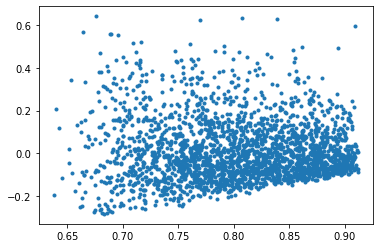

In [675]:
plt.plot(y_pred_NN.cpu().numpy().reshape(-1) ,y_pred_NN.cpu().numpy().reshape(-1)- test_samples_score,".")

### predicted vs actual values

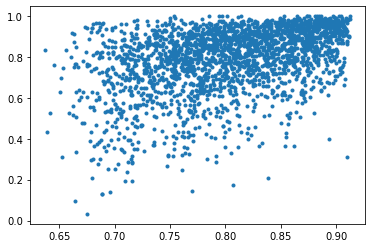

In [662]:
plt.plot(y_pred_NN.cpu().numpy(),test_samples_score,".")

## try standarization instead of normalization

In [602]:
df3 = df.copy(deep=True)

In [603]:
age = np.array(df3["required_age"]).reshape(-1)

In [604]:
age.shape

(7995,)

In [605]:
age

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [606]:
df3["required_age"] = (age - np.min(age))/(np.max(age) - np.min(age))

## price

In [607]:
price = np.array(df3["price"]).reshape(-1)

In [608]:
df3["price"] = (price- np.min(price))/(np.max(price) - np.min(price))

In [609]:
df3["price"]

0       0.137914
1       0.039904
2       0.049905
3       0.599960
4       0.079908
          ...   
7990    0.149915
7991    0.069907
7992    0.149915
7993    0.019902
7994    0.124912
Name: price, Length: 7995, dtype: float64

## release year

In [610]:
year = df3["release_year"]

In [611]:
df3["release_year"] = (year- np.min(year))/(np.max(year) - np.min(year))

In [612]:
df3["release_year"]

0       0.92
1       0.92
2       0.92
3       0.96
4       0.92
        ... 
7990    0.96
7991    0.72
7992    0.76
7993    0.96
7994    0.88
Name: release_year, Length: 7995, dtype: float64

In [613]:
Dataloader_steam = SteamData(df3)

In [614]:
BATCHSIZE = 64

In [615]:
generator=torch.Generator().manual_seed(42)

In [616]:
train_size = int(0.7 * len(df3))
test_size = len(df3) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(Dataloader_steam, [train_size, test_size], generator =generator)

In [617]:
SteamData_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCHSIZE,
shuffle=True)

SteamData_val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCHSIZE,
shuffle=False)

In [618]:
model3 = NN3()

In [619]:
model3 = model3.to(device=device)
model3 = model3.double()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()
model3.train()
n_epochs = 50

In [620]:
training_loop(n_epochs, optimizer, model3, loss_fn, SteamData_train_loader, SteamData_val_loader)

C:\Users\Marco\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


2023-01-24 03:45:09.057735 Epoch 1, Training loss 0.05881532714388049, Validation Loss: 0.058760509249762234
2023-01-24 03:45:29.882238 Epoch 10, Training loss 0.05881412436783997, Validation Loss: 0.058760509249762234
2023-01-24 03:45:51.771024 Epoch 20, Training loss 0.05873697361095657, Validation Loss: 0.058760509249762234


KeyboardInterrupt: 